In [ ]:
# PLOTS IN X Y Z
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

cmd.reinitialize()

# Load base files
files = ['4f3t.cif', 'PIK3CB_pos3_mismatch.cif', 'PIK3CB_pos7_mismatch.cif']

# Add 8 more random files from ../output_cifs directory
# output_dir = '../output_cifs'
output_dir = '../amide/step5'
additional_files = random.sample(os.listdir(output_dir), 8)
files.extend([os.path.join(output_dir, file) for file in additional_files])

structures = []
for file in files:
    name = os.path.basename(file).split('.')[0]  # Just the file name without extension
    cmd.load(file, name)
    structures.append(name)

# Align all structures to the guide target (structure[0])
for name in structures[1:]:
    cmd.align(name, structures[0])

# Chain A data processing
residues_A = {}
for name in structures:
    cmd.select('chain_A', f'{name} and chain A')
    atoms = cmd.get_model('chain_A').atom
    residues_A[name] = {(atom.chain, int(atom.resi)): atom.coord for atom in atoms}

common_residues_A = sorted(set.intersection(*(set(residues_A[name].keys()) for name in structures)))

index_A = []
dx_A = {name: [] for name in structures[1:]}
dy_A = {name: [] for name in structures[1:]}
dz_A = {name: [] for name in structures[1:]}

for idx, key in enumerate(common_residues_A):
    coord_ref = np.array(residues_A[structures[0]][key])
    x_ref, y_ref, z_ref = coord_ref
    index_A.append(idx)
    for name in structures[1:]:
        coord = np.array(residues_A[name][key])
        x, y, z = coord
        dx = x - x_ref
        dy = y - y_ref
        dz = z - z_ref
        dx_A[name].append(dx)
        dy_A[name].append(dy)
        dz_A[name].append(dz)

# Plot Chain A X Difference
plt.figure(figsize=(14, 7))
for name in structures[1:]:
    plt.plot(index_A, dx_A[name], label=name)
plt.xlabel('Residue Index')
plt.ylabel('X Difference (Å)')
plt.title('Chain A X Coordinate Difference')
plt.legend()
plt.show()

# Plot Chain A Y Difference
plt.figure(figsize=(14, 7))
for name in structures[1:]:
    plt.plot(index_A, dy_A[name], label=name)
plt.xlabel('Residue Index')
plt.ylabel('Y Difference (Å)')
plt.title('Chain A Y Coordinate Difference')
plt.legend()
plt.show()

# Plot Chain A Z Difference
plt.figure(figsize=(14, 7))
for name in structures[1:]:
    plt.plot(index_A, dz_A[name], label=name)
plt.xlabel('Residue Index')
plt.ylabel('Z Difference (Å)')
plt.title('Chain A Z Coordinate Difference')
plt.legend()
plt.show()

# Chains B and C data processing
residues_BC = {}
for name in structures:
    cmd.select('chain_BC', f'{name} and (chain B or chain C)')
    atoms = cmd.get_model('chain_BC').atom
    residues_BC[name] = {(atom.chain, int(atom.resi)): atom.coord for atom in atoms}

common_residues_BC = sorted(set.intersection(*(set(residues_BC[name].keys()) for name in structures)))

index_BC = []
dx_BC = {name: [] for name in structures[1:]}
dy_BC = {name: [] for name in structures[1:]}
dz_BC = {name: [] for name in structures[1:]}
chain_order = []

for idx, key in enumerate(common_residues_BC):
    coord_ref = np.array(residues_BC[structures[0]][key])
    x_ref, y_ref, z_ref = coord_ref
    index_BC.append(idx)
    chain_order.append(f'{key[0]}{key[1]}')  # Store chain and residue number for x-axis
    for name in structures[1:]:
        coord = np.array(residues_BC[name][key])
        x, y, z = coord
        dx = x - x_ref
        dy = y - y_ref
        dz = z - z_ref
        dx_BC[name].append(dx)
        dy_BC[name].append(dy)
        dz_BC[name].append(dz)

# Plot Chains B and C X Difference
plt.figure(figsize=(14, 7))
for name in structures[1:]:
    plt.plot(index_BC, dx_BC[name], label=name)
plt.xticks(ticks=range(len(chain_order)), labels=chain_order, rotation=90)
plt.xlabel('Chain and Residue')
plt.ylabel('X Difference (Å)')
plt.title('Chains B and C X Coordinate Difference')
plt.legend()
plt.show()

# Plot Chains B and C Y Difference
plt.figure(figsize=(14, 7))
for name in structures[1:]:
    plt.plot(index_BC, dy_BC[name], label=name)
plt.xticks(ticks=range(len(chain_order)), labels=chain_order, rotation=90)
plt.xlabel('Chain and Residue')
plt.ylabel('Y Difference (Å)')
plt.title('Chains B and C Y Coordinate Difference')
plt.legend()
plt.show()

# Plot Chains B and C Z Difference
plt.figure(figsize=(14, 7))
for name in structures[1:]:
    plt.plot(index_BC, dz_BC[name], label=name)
plt.xticks(ticks=range(len(chain_order)), labels=chain_order, rotation=90)
plt.xlabel('Chain and Residue')
plt.ylabel('Z Difference (Å)')
plt.title('Chains B and C Z Coordinate Difference')
plt.legend()
plt.show()


In [ ]:
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt
import os

cmd.reinitialize()

# Files to load including the new 'PIK3CB_guide_target_nophos.pdb'
files = ['PIK3CB_guide_target.cif', 'PIK3CB_pos3_mismatch.cif', 'PIK3CB_pos7_mismatch.cif', 
         'step4.0_minimization.gro', 'PIK3CB_guide_target_nophos.pdb']

structures = []

# Load and remove protons for each file
for file in files:
    name = os.path.basename(file).split('.')[0]  # Just the file name without extension
    cmd.load(file, name)
    cmd.remove(f'{name} and hydrogen')  # Remove all protons (hydrogen atoms)
    structures.append(name)

# Align all structures to the guide target (structure[0])
for name in structures[1:]:
    cmd.align(name, structures[0])

# Processing for 'not_C3' selection (previously Chain A)
residues_A = {}
for name in structures:
    cmd.select('not_C3', f'{name} and not byres name C3\'')  # Select residues that don't contain C3'
    atoms = cmd.get_model('not_C3').atom
    residues_A[name] = {int(atom.resi): atom.coord for atom in atoms}  # Only use residue index

# Common residues across structures for not_C3
common_residues_A = sorted(set.intersection(*(set(residues_A[name].keys()) for name in structures)))

index_A = []
distances_A = {name: [] for name in structures[1:]}

# Calculate distances for not_C3 residues (Chain A equivalent)
for idx, key in enumerate(common_residues_A):
    coord_ref = np.array(residues_A[structures[0]][key])
    index_A.append(idx)
    for name in structures[1:]:
        coord = np.array(residues_A[name][key])
        dist = np.linalg.norm(coord - coord_ref)
        distances_A[name].append(dist)

# Plot for not_C3 (Chain A equivalent)
plt.figure(figsize=(14, 7))
for name in structures[1:]:
    plt.plot(index_A, distances_A[name], label=name)

plt.xlabel('Residue Index')
plt.ylabel('Distance')
plt.title('Chain A (not C3\') Distance Comparison (Protons Removed)')
plt.legend()
plt.show()

# Processing for 'has_C3' selection (previously Chains B and C)
residues_BC = {}
for name in structures:
    cmd.select('has_C3', f'{name} and byres name C3\'')  # Select residues that contain C3'
    atoms = cmd.get_model('has_C3').atom
    residues_BC[name] = {int(atom.resi): atom.coord for atom in atoms}  # Only use residue index

# Common residues across structures for has_C3 (Chains B and C equivalent)
common_residues_BC = sorted(set.intersection(*(set(residues_BC[name].keys()) for name in structures)))

index_BC = []
distances_BC = {name: [] for name in structures[1:]}
chain_order = []

# Calculate distances for has_C3 residues (Chains B and C equivalent)
for idx, key in enumerate(common_residues_BC):
    coord_ref = np.array(residues_BC[structures[0]][key])
    index_BC.append(idx)
    chain_order.append(f'{key}')  # Store residue index for x-axis
    for name in structures[1:]:
        coord = np.array(residues_BC[name][key])
        dist = np.linalg.norm(coord - coord_ref)
        distances_BC[name].append(dist)

# Plot for has_C3 (Chains B and C equivalent)
plt.figure(figsize=(14, 7))
for name in structures[1:]:
    plt.plot(index_BC, distances_BC[name], label=name)

plt.xticks(ticks=range(len(chain_order)), labels=chain_order, rotation=90)
plt.xlabel('Residue Index')
plt.ylabel('Distance')
plt.title('Chains B and C (has C3\') Distance Comparison (Protons Removed)')
plt.legend()
plt.show()


In [10]:
print(f"Count of common residues in Chain A: {len(common_residues_A)}")
print(f"Count of common residues in Chains B and C: {len(common_residues_BC)}")


Count of common residues in Chain A: 859
Count of common residues in Chains B and C: 21


In [11]:
## PROBLEMS WITH INDEX AND DISTANCE CALCULATION IN GRO FILES
from pymol import cmd
import os

cmd.reinitialize()

# Files to load including the new 'step4.0_minimization.gro' and 'PIK3CB_guide_target.cif'
files = ['PIK3CB_guide_target.cif', 'step4.0_minimization.gro']

structures = []

# Load and remove protons for each file
for file in files:
    name = os.path.basename(file).split('.')[0]  # Just the file name without extension
    cmd.load(file, name)
    cmd.remove(f'{name} and hydrogen')  # Remove all protons (hydrogen atoms)
    structures.append(name)

# Processing for `not_C3` selection (previously Chain A)
residues_A = {}
for name in structures:
    cmd.select('not_C3', f'{name} and not byres name C3\'')  # Select residues that don't contain C3'
    atoms = cmd.get_model('not_C3').atom
    # Store residue index only, ignore the chain identifier
    residues_A[name] = {int(atom.resi): atom.coord for atom in atoms}

# Print the first 5 entries of each structure's residues_A
for name in structures:
    print(f"First 5 entries in {name} residues_A:", list(residues_A[name].keys())[:5])

# Processing for `has_C3` selection (previously Chains B and C)
residues_BC = {}
for name in structures:
    cmd.select('has_C3', f'{name} and byres name C3\'')  # Select residues that contain C3'
    atoms = cmd.get_model('has_C3').atom
    # Store residue index only, ignore the chain identifier
    residues_BC[name] = {int(atom.resi): atom.coord for atom in atoms}

# Print the first 5 entries of each structure's residues_BC
for name in structures:
    print(f"First 5 entries in {name} residues_BC:", list(residues_BC[name].keys())[:5])

# Intersection and common residues by ignoring chain identifier
common_residues_A = sorted(set.intersection(*(set(residues_A[name].keys()) for name in structures)))
common_residues_BC = sorted(set.intersection(*(set(residues_BC[name].keys()) for name in structures)))

print("First 5 entries in common_residues_A (ignoring chains):", common_residues_A[:5])
print("First 5 entries in common_residues_BC (ignoring chains):", common_residues_BC[:5])


First 5 entries in PIK3CB_guide_target residues_A: [1, 2, 3, 4, 5]
First 5 entries in step4 residues_A: [1, 2, 3, 4, 5]
First 5 entries in PIK3CB_guide_target residues_BC: [1, 2, 3, 4, 5]
First 5 entries in step4 residues_BC: [1, 2, 3, 4, 5]
First 5 entries in common_residues_A (ignoring chains): [1, 2, 3, 4, 5]
First 5 entries in common_residues_BC (ignoring chains): [1, 2, 3, 4, 5]


In [17]:
## PROBLEMS WITH DISTANCE CALCULATION IN GRO FILES
from pymol import cmd
import numpy as np
import os

cmd.reinitialize()

# Files to load: only the reference and minimized structure
files = ['PIK3CB_guide_target.cif', 'step4.0_minimization.gro']

structures = []

# Load and remove protons for each file
for file in files:
    name = os.path.basename(file).split('.')[0]  # Just the file name without extension
    cmd.load(file, name)
    cmd.remove(f'{name} and hydrogen')  # Remove all protons (hydrogen atoms)
    structures.append(name)

# Align step4.0_minimization.gro to the guide target
cmd.align(structures[1], structures[0])

# Processing for 'not_C3' selection (previously Chain A)
residues_A = {}
for name in structures:
    cmd.select('not_C3', f'{name} and not byres name C3\'')  # Select residues that don't contain C3'
    atoms = cmd.get_model('not_C3').atom
    residues_A[name] = {int(atom.resi): atom.coord for atom in atoms}  # Only use residue index

# Common residues across structures for not_C3
common_residues_A = sorted(set.intersection(*(set(residues_A[name].keys()) for name in structures)))

# Filter to focus on the residues between indexes 185 and 199
common_residues_A_filtered = [key for key in common_residues_A if 185 <= key <= 199]

# Calculate distances for filtered residues and print them
print("Residue Index | Distance")
for key in common_residues_A_filtered:
    coord_ref = np.array(residues_A[structures[0]][key])
    coord_step4 = np.array(residues_A[structures[1]][key])
    dist = np.linalg.norm(coord_step4 - coord_ref)
    print(f"{key} | {dist:.4f}")


Residue Index | Distance
185 | 3.2406
186 | 6.6957
187 | 0.0942
188 | 4.4474
189 | 3.0785
190 | 5.0776
191 | 3.4502
192 | 5.4569
193 | 0.2157
194 | 0.1073
195 | 0.1000
196 | 9.2035
197 | 5.4527
198 | 3.6021
199 | 8.3550


In [18]:
## PROBLEMS WITH DISTANCE CALCULATION IN GRO FILES
from pymol import cmd
import os

cmd.reinitialize()

# Files to load: only the reference and minimized structure
files = ['PIK3CB_guide_target.cif', 'step4.0_minimization.gro']

# Load the files
cmd.load(files[0], 'guide_target')
cmd.load(files[1], 'minimization')

# Remove all protons
cmd.remove('guide_target and hydrogen')
cmd.remove('minimization and hydrogen')

# Align the minimized structure to the guide target
cmd.align('minimization', 'guide_target')

# Measure the distance between the alpha carbons (CA) of residue 190 in both structures
distance = cmd.distance("dist_resi_190", "/minimization///190/CA", "/guide_target///190/CA")

# Print the distance
print(f"Distance between residue 190 in the two structures: {distance:.4f}")


Distance between residue 190 in the two structures: 0.0775


In [6]:
## PROBLEMS WITH DISTANCE CALCULATION IN GRO FILES
from pymol import cmd
import numpy as np
import os

cmd.reinitialize()

# Files to load: only the reference and minimized structure
files = ['PIK3CB_guide_target.cif', 'step4.0_minimization.gro']

structures = []

# Load and remove protons for each file
for file in files:
    name = os.path.basename(file).split('.')[0]  # Just the file name without extension
    cmd.load(file, name)
    cmd.remove(f'{name} and hydrogen')  # Remove all protons (hydrogen atoms)
    structures.append(name)

# Align step4.0_minimization.gro to the guide target
cmd.align(structures[1], structures[0])

# Processing for 'not_C3' selection (previously Chain A)
residues_A = {}
for name in structures:
    cmd.select('not_C3', f'{name} and not byres name C3\'')  # Select residues that don't contain C3'
    atoms = cmd.get_model('not_C3').atom
    residues_A[name] = {int(atom.resi): atom.coord for atom in atoms}  # Only use residue index

# Focus only on residue 190
key = 190

# Calculate the residue-level distance for residue 190
coord_ref_residue = np.array(residues_A[structures[0]][key])
coord_step4_residue = np.array(residues_A[structures[1]][key])
dist_residue = np.linalg.norm(coord_step4_residue - coord_ref_residue)

# Print residue-level distance
print(f"Residue {key} - Residue-level Distance: {dist_residue:.4f}")

# Now calculate atom-level distances for all atoms within residue 190
atom_ref = cmd.get_model(f"{structures[0]} and resi {key}").atom
atom_step4 = cmd.get_model(f"{structures[1]} and resi {key}").atom

print(f"Atom-level distances for residue {key}:")

for ref_atom, step4_atom in zip(atom_ref, atom_step4):
    atom_name = ref_atom.name
    
    # Original method using model
    coord_ref_atom = np.array([ref_atom.coord[0], ref_atom.coord[1], ref_atom.coord[2]])
    coord_step4_atom = np.array([step4_atom.coord[0], step4_atom.coord[1], step4_atom.coord[2]])
    dist_atom = np.linalg.norm(coord_step4_atom - coord_ref_atom)
    
    # Print original method details
    print(f"Original Method - Atom {atom_name} - Ref Coord: {coord_ref_atom} | Step4 Coord: {coord_step4_atom} | Distance: {dist_atom:.4f}")
    
    # New method using PyMOL's get_atom_coords function
    ref_selection = f"/{structures[0]}///{key}/{atom_name}"
    step4_selection = f"/{structures[1]}///{key}/{atom_name}"
    
    coord_ref_atom_alt = np.array(cmd.get_atom_coords(ref_selection))
    coord_step4_atom_alt = np.array(cmd.get_atom_coords(step4_selection))
    dist_atom_alt = np.linalg.norm(coord_step4_atom_alt - coord_ref_atom_alt)
    
    # Print new method details
    print(f"New Method - Atom {atom_name} - Ref Coord: {coord_ref_atom_alt} | Step4 Coord: {coord_step4_atom_alt} | Distance: {dist_atom_alt:.4f}")

print(f"Residue {key} - Residue-level Distance: {np.linalg.norm(coord_step4 - coord_ref):.4f}")



Residue 190 - Residue-level Distance: 5.0718
Atom-level distances for residue 190:
Original Method - Atom N - Ref Coord: [-19.95299911 -11.03199959   7.70300007] | Step4 Coord: [-20.03870964 -11.05088139   7.64029789] | Distance: 0.1079
New Method - Atom N - Ref Coord: [-19.95299911 -11.03199959   7.70300007] | Step4 Coord: [-20.03870964 -11.05088139   7.64029789] | Distance: 0.1079
Original Method - Atom CA - Ref Coord: [-19.85099983 -12.4829998    7.52199984] | Step4 Coord: [-19.88868713 -12.51088238   7.46032333] | Distance: 0.0775
New Method - Atom CA - Ref Coord: [-19.85099983 -12.4829998    7.52199984] | Step4 Coord: [-19.88868713 -12.51088238   7.46032333] | Distance: 0.0775
Original Method - Atom C - Ref Coord: [-19.00799942 -13.07199955   8.64099979] | Step4 Coord: [-19.23868752 -12.82089996   6.10033417] | Distance: 2.5634
New Method - Atom C - Ref Coord: [-19.00799942 -13.07199955   8.64099979] | Step4 Coord: [-19.0386734  -13.11084461   8.59033394] | Distance: 0.0708
Origin

In [ ]:
from pymol import cmd
import numpy as np
import os

cmd.reinitialize()

# Files to load including the new 'PIK3CB_guide_target_nophos.pdb'
files = ['PIK3CB_guide_target.cif', 'PIK3CB_pos3_mismatch.cif', 'PIK3CB_pos7_mismatch.cif', 
         'step4.0_minimization.gro', 'PIK3CB_guide_target_nophos.pdb']

structures = []

# Load and remove protons for each file
for file in files:
    name = os.path.basename(file).split('.')[0]  # Just the file name without extension
    cmd.load(file, name)
    cmd.remove(f'{name} and hydrogen')  # Remove all protons (hydrogen atoms)
    structures.append(name)

# Align all structures to the guide target (structure[0])
for name in structures[1:]:
    cmd.align(name, structures[0])

# Define selections
cmd.select('not_C3', f'{structures[0]} and not byres name C3\'')  # Protein only (no RNA)
cmd.select('has_C3', f'{structures[0]} and byres name C3\'')  # RNA (has C3')

# Processing for 'not_C3' (protein region)
residues_A = {}
for name in structures:
    cmd.select(f'not_C3_{name}', f'{name} and not byres name C3\'')  # Proper selection for protein region
    atoms = cmd.get_model(f'not_C3_{name}').atom
    residues_A[name] = {int(atom.resi): atom.coord for atom in atoms}  # Use only residue index for protein

# Common residues across structures for not_C3 (protein region)
common_residues_A = sorted(set.intersection(*(set(residues_A[name].keys()) for name in structures)))

print("\nNew Method: Atom-level distances for not_C3 residues (Protein-only region):")
for key in common_residues_A:
    # Loop through atoms in the residue
    atom_names = cmd.get_model(f'{structures[0]} and not byres name C3\' and resi {key}').atom
    
    for atom in atom_names:
        atom_name = atom.name
        
        # Get atom coordinates from the first structure
        ref_selection = f"/{structures[0]}///{key}/{atom_name}"
        step4_selection = f"/{structures[1]}///{key}/{atom_name}"
        
        try:
            coord_ref_atom = np.array(cmd.get_atom_coords(ref_selection))
            coord_step4_atom = np.array(cmd.get_atom_coords(step4_selection))
            dist_atom = np.linalg.norm(coord_step4_atom - coord_ref_atom)
            
            # Print atom-level distances
            print(f"Atom {atom_name} in residue {key} - Ref Coord: {coord_ref_atom} | Step4 Coord: {coord_step4_atom} | Distance: {dist_atom:.4f}")
        except:
            # Handle missing atoms
            print(f"Atom {atom_name} not found in one of the structures at resi {key}.")

# Processing for 'has_C3' (RNA region)
residues_BC = {}
for name in structures:
    cmd.select(f'has_C3_{name}', f'{name} and byres name C3\'')  # Proper selection for RNA
    atoms = cmd.get_model(f'has_C3_{name}').atom
    residues_BC[name] = {int(atom.resi): atom.coord for atom in atoms}  # Use only residue index for RNA

# Common residues across structures for has_C3 (RNA region)
common_residues_BC = sorted(set.intersection(*(set(residues_BC[name].keys()) for name in structures)))

print("\nNew Method: Atom-level distances for has_C3 residues (RNA region):")
for key in common_residues_BC:
    # Loop through atoms in the residue
    atom_names = cmd.get_model(f'{structures[0]} and byres name C3\' and resi {key}').atom
    
    for atom in atom_names:
        atom_name = atom.name
        
        # Get atom coordinates from the first structure
        ref_selection = f"/{structures[0]}///{key}/{atom_name}"
        step4_selection = f"/{structures[1]}///{key}/{atom_name}"
        
        try:
            coord_ref_atom = np.array(cmd.get_atom_coords(ref_selection))
            coord_step4_atom = np.array(cmd.get_atom_coords(step4_selection))
            dist_atom = np.linalg.norm(coord_step4_atom - coord_ref_atom)
            
            # Print atom-level distances
            print(f"Atom {atom_name} in residue {key} - Ref Coord: {coord_ref_atom} | Step4 Coord: {coord_step4_atom} | Distance: {dist_atom:.4f}")
        except:
            # Handle missing atoms
            print(f"Atom {atom_name} not found in one of the structures at resi {key}.")


In [ ]:
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt

cmd.reinitialize()

# Load the reference and minimized structure
files = ['PIK3CB_guide_target.cif', 'step4.0_minimization.gro']
structures = []

# Load and remove protons for each file
for file in files:
    name = os.path.basename(file).split('.')[0]
    cmd.load(file, name)
    cmd.remove(f'{name} and hydrogen')  # Remove all protons (hydrogen atoms)
    structures.append(name)

# Align step4.0_minimization.gro to the guide target
cmd.align(structures[1], structures[0])

# Define selections for protein-only regions (not C3')
cmd.select('not_C3_ref', f'{structures[0]} and not byres name C3\'')
cmd.select('not_C3_step4', f'{structures[1]} and not byres name C3\'')

# Processing for 'not_C3' (protein region)
residues_A = {}
for name in structures:
    cmd.select(f'not_C3_{name}', f'{name} and not byres name C3\'')
    atoms = cmd.get_model(f'not_C3_{name}').atom
    residues_A[name] = {int(atom.resi): atom for atom in atoms}

# Common residues across structures for not_C3 (protein region)
common_residues_A = sorted(set.intersection(*(set(residues_A[name].keys()) for name in structures)))

# Calculate distances using the new method with not_C3 selection
index_A = []
distances_A = []

for key in common_residues_A:
    ref_atoms = [atom for atom in cmd.get_model(f'not_C3_ref and resi {key}').atom]
    step4_atoms = [atom for atom in cmd.get_model(f'not_C3_step4 and resi {key}').atom]
    
    # Ensure that both selections have the same number of atoms
    if len(ref_atoms) == len(step4_atoms):
        for ref_atom, step4_atom in zip(ref_atoms, step4_atoms):
            # Get coordinates with the not_C3 selection
            coord_ref = np.array(cmd.get_atom_coords(f'not_C3_ref and resi {key} and name {ref_atom.name}'))
            coord_step4 = np.array(cmd.get_atom_coords(f'not_C3_step4 and resi {key} and name {step4_atom.name}'))
            dist = np.linalg.norm(coord_step4 - coord_ref)
            
            index_A.append(key)
            distances_A.append(dist)

# Plot for not_C3 (protein region)
plt.figure(figsize=(14, 7))
plt.plot(index_A, distances_A, label='step4.0_minimization.gro')
plt.xlabel('Residue Index')
plt.ylabel('Distance')
plt.title('Protein Region (not C3\') Distance Comparison (Protons Removed)')
plt.legend()
plt.show()


In [ ]:
# SHOWS UPDATED DISTANCE CALCULATOR, COMPARES THE TWO METHODS
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt
import os

cmd.reinitialize()

# Load the reference and minimized structure
files = ['PIK3CB_guide_target.cif', 'PIK3CB_pos3_mismatch.cif']
structures = []

# Load and remove protons for each file
for file in files:
    name = os.path.basename(file).split('.')[0]
    cmd.load(file, name)
    cmd.remove(f'{name} and hydrogen')  # Remove all protons (hydrogen atoms)
    structures.append(name)

# Align step4.0_minimization.gro to the guide target
cmd.align(structures[1], structures[0])

# Define selections for protein-only regions (not C3')
cmd.select('not_C3_ref', f'{structures[0]} and not byres name C3\'')
cmd.select('not_C3_step4', f'{structures[1]} and not byres name C3\'')

# Processing for 'not_C3' (protein region)
residues_A = {}
for name in structures:
    cmd.select(f'not_C3_{name}', f'{name} and not byres name C3\'')
    atoms = cmd.get_model(f'not_C3_{name}').atom
    residues_A[name] = {int(atom.resi): atom for atom in atoms}

# Common residues across structures for not_C3 (protein region)
common_residues_A = sorted(set.intersection(*(set(residues_A[name].keys()) for name in structures)))

index_A = []
distances_A = []
residue_distances_A = []

for key in common_residues_A:
    ref_atoms = [atom for atom in cmd.get_model(f'not_C3_ref and resi {key}').atom]
    step4_atoms = [atom for atom in cmd.get_model(f'not_C3_step4 and resi {key}').atom]

    if len(ref_atoms) == len(step4_atoms):
        atom_distances = []
        ref_coords = []
        step4_coords = []

        for ref_atom, step4_atom in zip(ref_atoms, step4_atoms):
            coord_ref = np.array(cmd.get_atom_coords(f'not_C3_ref and resi {key} and name {ref_atom.name}'))
            coord_step4 = np.array(cmd.get_atom_coords(f'not_C3_step4 and resi {key} and name {step4_atom.name}'))
            dist = np.linalg.norm(coord_step4 - coord_ref)
            atom_distances.append(dist)
            ref_coords.append(coord_ref)
            step4_coords.append(coord_step4)

        # Residue-level distance: average position (center of mass)
        coord_ref_residue = np.mean(ref_coords, axis=0)
        coord_step4_residue = np.mean(step4_coords, axis=0)
        residue_dist = np.linalg.norm(coord_step4_residue - coord_ref_residue)

        index_A.append(key)
        distances_A.append(np.mean(atom_distances))  # Atom-level distance
        residue_distances_A.append(residue_dist)  # Residue-level distance

# Plot Atom-level Distance for not_C3 (protein region)
plt.figure(figsize=(14, 7))
plt.plot(index_A, distances_A, label='Atom-level Distance')
plt.xlabel('Residue Index')
plt.ylabel('Distance')
plt.title('Protein Region (not C3\') Atom-level Distance Comparison')
plt.legend()
plt.show()

# Plot Residue-level Distance for not_C3 (protein region)
plt.figure(figsize=(14, 7))
plt.plot(index_A, residue_distances_A, label='Residue-level Distance', color='orange')
plt.xlabel('Residue Index')
plt.ylabel('Distance')
plt.title('Protein Region (not C3\') Residue-level Distance Comparison')
plt.legend()
plt.show()


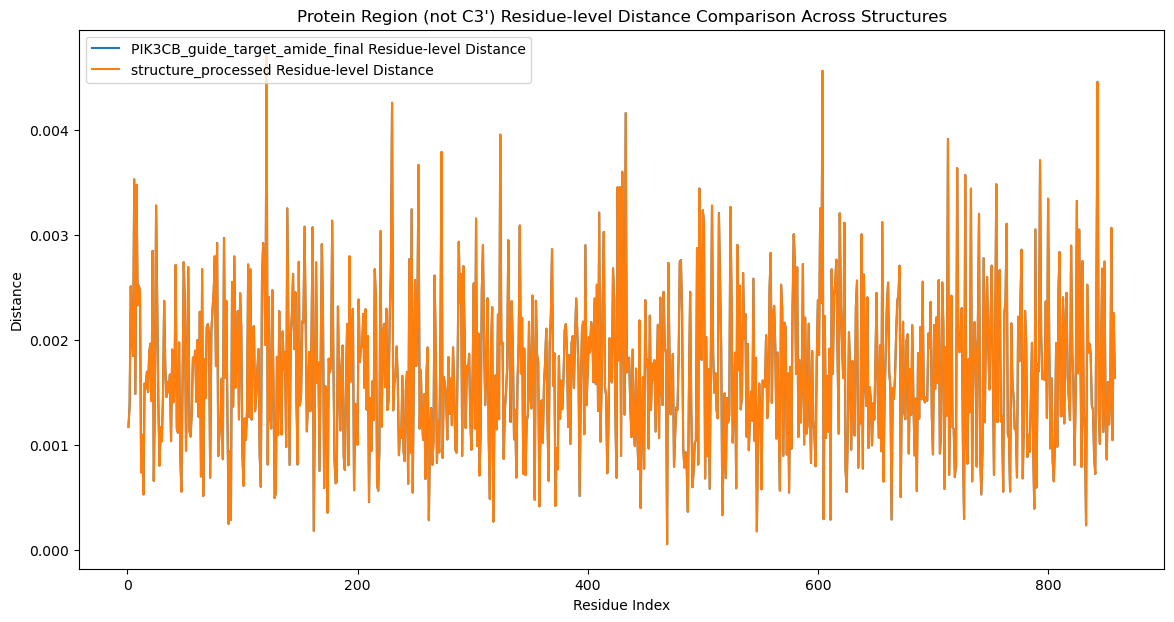

In [28]:
## o1 ftw, finally works.
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt
import os

cmd.reinitialize()

# Files to load: reference and comparison structures
files = [
    # ('PIK3CB_guide_target.cif', 'PIK3CB_pos3_mismatch.cif'),
    # ('PIK3CB_guide_target.cif', 'PIK3CB_pos7_mismatch.cif'),
    ('PIK3CB_guide_target.cif', 'PIK3CB_guide_target_amide_final.pdb'),
    ('PIK3CB_guide_target.cif', 'structure_processed.gro'),
    ('PIK3CB_guide_target.cif', 'PIK3CB_guide_target_amide_final.gro')
]

# Data storage for indices and distances
all_indices = []
distance_dicts = []
comp_names = []

# Loop over each comparison pair
for ref_file, comp_file in files:
    cmd.reinitialize()  # Reinitialize PyMOL before each iteration
    
    # Load and remove protons for reference and comparison
    cmd.load(ref_file, 'ref')
    cmd.load(comp_file, 'comp')
    cmd.remove('ref and hydrogen')
    cmd.remove('comp and hydrogen')
    cmd.align('comp', 'ref')
    
    # Define selections for protein-only regions (not C3')
    cmd.select('not_C3_ref', 'ref and not byres name C3\'')
    cmd.select('not_C3_comp', 'comp and not byres name C3\'')
    
    # Processing for 'not_C3' (protein region)
    residues_A = {}
    for name in ['ref', 'comp']:
        cmd.select(f'not_C3_{name}', f'{name} and not byres name C3\'')
        atoms = cmd.get_model(f'not_C3_{name}').atom
        residues_A[name] = {int(atom.resi): atom for atom in atoms}
    
    # Find common residues between ref and comp
    common_residues_A = sorted(set(residues_A['ref'].keys()) & set(residues_A['comp'].keys()))
    
    index_A = []
    distances_A = []
    
    # Calculate distances
    for key in common_residues_A:
        ref_atoms = [atom for atom in cmd.get_model(f'not_C3_ref and resi {key}').atom]
        comp_atoms = [atom for atom in cmd.get_model(f'not_C3_comp and resi {key}').atom]
        
        if len(ref_atoms) == len(comp_atoms):
            ref_coords = []
            comp_coords = []
            
            for ref_atom, comp_atom in zip(ref_atoms, comp_atoms):
                coord_ref = np.array(cmd.get_atom_coords(f'not_C3_ref and resi {key} and name {ref_atom.name}'))
                coord_comp = np.array(cmd.get_atom_coords(f'not_C3_comp and resi {key} and name {comp_atom.name}'))
                ref_coords.append(coord_ref)
                comp_coords.append(coord_comp)
            
            # Residue-level distance: average position (center of mass)
            coord_ref_residue = np.mean(ref_coords, axis=0)
            coord_comp_residue = np.mean(comp_coords, axis=0)
            residue_dist = np.linalg.norm(coord_comp_residue - coord_ref_residue)
            
            index_A.append(key)
            distances_A.append(residue_dist)
    
    # Store indices and distances
    all_indices.append(set(index_A))
    distance_dicts.append(dict(zip(index_A, distances_A)))
    comp_name = os.path.basename(comp_file).split('.')[0]
    comp_names.append(comp_name)

# Compute common residue indices across all comparisons
combined_index_A = sorted(set.intersection(*all_indices))

# Align distances with combined indices
combined_distances_A = {}
for comp_name, distance_dict in zip(comp_names, distance_dicts):
    distances = [distance_dict[i] for i in combined_index_A]
    combined_distances_A[comp_name] = distances

# Plot Residue-level Distance for all comparisons
plt.figure(figsize=(14, 7))
for comp_name, distances in combined_distances_A.items():
    plt.plot(combined_index_A, distances, label=f'{comp_name} Residue-level Distance')

plt.xlabel('Residue Index')
plt.ylabel('Distance')
plt.title("Protein Region (not C3') Residue-level Distance Comparison Across Structures")
plt.legend()
plt.show()


In [ ]:
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt
import os

cmd.reinitialize()

# Files to load: reference and comparison structures
files = [
    # ('PIK3CB_guide_target.cif', 'PIK3CB_guide_target_amide_final.pdb'),
    ('PIK3CB_guide_target.cif', 'structure_processed.gro'),
    ('PIK3CB_guide_target.cif', 'PIK3CB_guide_target_amide_final.gro')
]

# Data storage for indices and distances
all_indices = []
atom_distance_dicts = []
comp_names = []

# Loop over each comparison pair
for ref_file, comp_file in files:
    cmd.reinitialize()  # Reinitialize PyMOL before each iteration
    
    # Load and remove protons for reference and comparison
    cmd.load(ref_file, 'ref')
    cmd.load(comp_file, 'comp')
    cmd.remove('ref and hydrogen')
    cmd.remove('comp and hydrogen')
    cmd.align('comp', 'ref')
    
    # Define selections for protein-only regions (not C3')
    cmd.select('not_C3_ref', 'ref and not byres name C3\'')
    cmd.select('not_C3_comp', 'comp and not byres name C3\'')
    
    # Processing for 'not_C3' (protein region)
    residues_A = {}
    for name in ['ref', 'comp']:
        cmd.select(f'not_C3_{name}', f'{name} and not byres name C3\'')
        atoms = cmd.get_model(f'not_C3_{name}').atom
        residues_A[name] = {int(atom.resi): atom for atom in atoms}
    
    # Find common residues between ref and comp
    common_residues_A = sorted(set(residues_A['ref'].keys()) & set(residues_A['comp'].keys()))
    
    index_A = []
    distances_A = []
    
    # Calculate atom-level distances
    for key in common_residues_A:
        ref_atoms = [atom for atom in cmd.get_model(f'not_C3_ref and resi {key}').atom]
        comp_atoms = [atom for atom in cmd.get_model(f'not_C3_comp and resi {key}').atom]
        
        if len(ref_atoms) == len(comp_atoms):
            atom_distances = []
            
            for ref_atom, comp_atom in zip(ref_atoms, comp_atoms):
                coord_ref = np.array(cmd.get_atom_coords(f'not_C3_ref and resi {key} and name {ref_atom.name}'))
                coord_comp = np.array(cmd.get_atom_coords(f'not_C3_comp and resi {key} and name {comp_atom.name}'))
                dist = np.linalg.norm(coord_comp - coord_ref)
                atom_distances.append(dist)
            
            # Append average atom-level distance for the residue
            index_A.append(key)
            distances_A.append(np.mean(atom_distances))
    
    # Store indices and distances
    all_indices.append(set(index_A))
    atom_distance_dicts.append(dict(zip(index_A, distances_A)))
    comp_name = os.path.basename(comp_file).split('.')[0]
    comp_names.append(comp_name)

# Compute common residue indices across all comparisons
combined_index_A = sorted(set.intersection(*all_indices))

# Align distances with combined indices
combined_atom_distances_A = {}
for comp_name, distance_dict in zip(comp_names, atom_distance_dicts):
    distances = [distance_dict[i] for i in combined_index_A]
    combined_atom_distances_A[comp_name] = distances

# Plot Atom-level Distance for all comparisons
plt.figure(figsize=(14, 7))
for comp_name, distances in combined_atom_distances_A.items():
    plt.plot(combined_index_A, distances, label=f'{comp_name} Atom-level Distance')

plt.xlabel('Residue Index')
plt.ylabel('Distance')
plt.title("Protein Region (not C3') Atom-level Distance Comparison Across Structures")
plt.legend()
plt.show()


In [ ]:
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt
import os

cmd.reinitialize()

# Files to load: reference and comparison structures
files = [
    # ('PIK3CB_guide_target.cif', 'PIK3CB_guide_target_amide_final.pdb'),
    ('PIK3CB_guide_target.cif', 'structure_processed.gro'),
    ('PIK3CB_guide_target.cif', 'PIK3CB_guide_target_amide_final.gro')
]

# Data storage for indices and distances
all_indices = []
distance_dicts = []
comp_names = []

# Loop over each comparison pair
for ref_file, comp_file in files:
    cmd.reinitialize()  # Reinitialize PyMOL before each iteration
    
    # Load and remove protons for reference and comparison
    cmd.load(ref_file, 'ref')
    cmd.load(comp_file, 'comp')
    cmd.remove('ref and hydrogen')
    cmd.remove('comp and hydrogen')
    cmd.align('comp', 'ref')
    
    # Define selections for protein-only regions (not C3')
    cmd.select('not_C3_ref', 'ref and not byres name C3\'')
    cmd.select('not_C3_comp', 'comp and not byres name C3\'')
    
    # Processing for 'not_C3' (protein region)
    residues_A = {}
    for name in ['ref', 'comp']:
        cmd.select(f'not_C3_{name}', f'{name} and not byres name C3\'')
        atoms = cmd.get_model(f'not_C3_{name}').atom
        residues_A[name] = {int(atom.resi): atom for atom in atoms}
    
    # Find common residues between ref and comp
    common_residues_A = sorted(set(residues_A['ref'].keys()) & set(residues_A['comp'].keys()))
    
    index_A = []
    distances_A = []
    
    # Calculate distances
    for key in common_residues_A:
        ref_atoms = [atom for atom in cmd.get_model(f'not_C3_ref and resi {key}').atom]
        comp_atoms = [atom for atom in cmd.get_model(f'not_C3_comp and resi {key}').atom]
        
        if len(ref_atoms) == len(comp_atoms):
            ref_coords = []
            comp_coords = []
            
            for ref_atom, comp_atom in zip(ref_atoms, comp_atoms):
                coord_ref = np.array(cmd.get_atom_coords(f'not_C3_ref and resi {key} and name {ref_atom.name}'))
                coord_comp = np.array(cmd.get_atom_coords(f'not_C3_comp and resi {key} and name {comp_atom.name}'))
                ref_coords.append(coord_ref)
                comp_coords.append(coord_comp)
            
            # Residue-level distance: average position (center of mass)
            coord_ref_residue = np.mean(ref_coords, axis=0)
            coord_comp_residue = np.mean(comp_coords, axis=0)
            residue_dist = np.linalg.norm(coord_comp_residue - coord_ref_residue)
            
            index_A.append(key)
            distances_A.append(residue_dist)
    
    # Store indices and distances
    all_indices.append(set(index_A))
    distance_dicts.append(dict(zip(index_A, distances_A)))
    comp_name = os.path.basename(comp_file).split('.')[0]
    comp_names.append(comp_name)

# Compute common residue indices across all comparisons
combined_index_A = sorted(set.intersection(*all_indices))

# Align distances with combined indices
combined_distances_A = {}
for comp_name, distance_dict in zip(comp_names, distance_dicts):
    distances = [distance_dict[i] for i in combined_index_A]
    combined_distances_A[comp_name] = distances

# Plot Residue-level Distance for all comparisons
plt.figure(figsize=(14, 7))
for comp_name, distances in combined_distances_A.items():
    plt.plot(combined_index_A, distances, label=f'{comp_name} Residue-level Distance')

plt.xlabel('Residue Index')
plt.ylabel('Distance')
plt.title("Protein Region (not C3') Residue-level Distance Comparison Across Structures")
plt.legend()
plt.show()


In [ ]:
################# LASTEST DISTANCES FOR PROTEIN
from pymol import cmd
import matplotlib.pyplot as plt
import os

cmd.reinitialize()
files = [
    # ('ref174780.cif', 'ENSG00000174780.cif'),
    # ('ENSG00000174780.cif', 'step4.0_minimization.gro'),
    # ('PIK3CB_guide_target.cif', 'step4.0_minimization.gro'),
    ('4f3t.cif', 'PIK3CB_guide_target.cif'),
    ('4f3t.cif', 'complete_md_amide/step5_ENSG00000000003.gro'),
    # ('PIK3CB_guide_target.cif', 'md/step5_amide_001_ENSG00000174780.gro'),
    ('4f3t.cif', 'complete_md_gna/step5_ENSG00000000003.gro'),

    ##contains amideRNASeq/test_alignment/ref174780.cif
    # ('PIK3CB_guide_target.cif', 'backup/step5_50000_iterations.gro'),
    # ('PIK3CB_guide_target.cif', 'backup/step5_100000_iterations.gro'),
    # ('PIK3CB_guide_target.cif', 'backup/step5_150000_iterations.gro'),
    # ('PIK3CB_guide_target.cif', 'backup/step5_200000_iterations.gro'),
    # #contains mismatch pos 7
    # ('PIK3CB_guide_target.cif', 'step5_50000_iterations.gro'),
    # ('PIK3CB_guide_target.cif', 'step5_100000_iterations.gro'),
    # ('PIK3CB_guide_target.cif', 'step5_150000_iterations.gro'),
    # ('PIK3CB_guide_target.cif', 'step5_200000_iterations.gro'),
]
# Directories to compare############################################
# set_number = 1
# amide_dir = 'complete_md_amide'
# gna_dir = 'complete_md_gna'
# reference_file = 'PIK3CB_guide_target.cif'
# start_index = (set_number - 1) * 3
# def filter_gro_files(directory):
#     return [f for f in sorted(os.listdir(directory)) if f.endswith('.gro') and os.path.isfile(os.path.join(directory, f))]
# amide_files = filter_gro_files(amide_dir)
# gna_files = filter_gro_files(gna_dir)
# amide_set = amide_files[start_index:start_index + 3]
# gna_set = gna_files[start_index:start_index + 3]
# files = []
# for amide_file in amide_set:
#     amide_path = os.path.join(amide_dir, amide_file)
#     if os.path.exists(amide_path):
#         files.append((reference_file, amide_path))
# for gna_file in gna_set:
#     gna_path = os.path.join(gna_dir, gna_file)
#     if os.path.exists(gna_path):
#         files.append((reference_file, gna_path))
##########################################################################

combined_index_A = list(range(1, 860))
combined_distances_A = {}
index = 0 
for ref_file, comp_file in files:
    cmd.reinitialize()
    
    print(f"Loading reference file: {ref_file}")
    print(f"Loading comparison file: {comp_file}")
    cmd.load(ref_file, 'ref')
    cmd.load(comp_file, 'comp')

    if cmd.count_atoms('ref') == 0 or cmd.count_atoms('comp') == 0:
        print(f"Error: One of the structures failed to load: {ref_file} or {comp_file}")
        continue

    cmd.remove('solvent')
    cmd.remove('ref and resn CL')
    cmd.remove('ref and resn NA+')
    cmd.remove('ref and hydrogen')
    cmd.remove('comp and hydrogen')

    alignment_rms = cmd.align('comp', 'ref')
    print(f"Alignment RMSD for {comp_file}: {alignment_rms}")

    cmd.select('not_C3_ref', 'ref and not byres name C3\'')
    cmd.select('not_C3_comp', 'comp and not byres name C3\'')

    ref_atom_count = cmd.count_atoms('not_C3_ref')
    comp_atom_count = cmd.count_atoms('not_C3_comp')
    print(f"Atoms in not_C3_ref: {ref_atom_count}, Atoms in not_C3_comp: {comp_atom_count}")

    if ref_atom_count == 0 or comp_atom_count == 0:
        print(f"Error: No atoms found in one of the selections for {comp_file}")
        continue

    distances_A = []

    for i in combined_index_A:
        distance = cmd.distance(f'dist_{i}', f'not_C3_ref and resi {i} and name C', f'not_C3_comp and resi {i} and name C')
        distances_A.append(distance)

    # comp_name = os.path.basename(comp_file).replace('.', '_')
    base_name = os.path.basename(comp_file).replace('.', '_') #this is to allow graphing of more than one file with same name
    comp_name = f"{base_name}_{index}"
    index += 1  

    if len(distances_A) > 0:
        combined_distances_A[comp_name] = distances_A
        print(f"Distances calculated for {comp_name}: {len(distances_A)}")
    else:
        print(f"Warning: No distances found for {comp_name}")

plt.figure(figsize=(14, 7))
for comp_name, distances in combined_distances_A.items():
    print(f"Plotting data for {comp_name}: {distances[:10]}...")
    plt.plot(combined_index_A, distances, label=f'{comp_name} Residue-level Distance')

plt.xlabel('Residue Index')
plt.ylabel('Distance (Å)')
plt.title("Protein Region (not C3') Residue-level Distance Comparison Across Structures")
plt.legend()
plt.show()

Sum of differences between first and last pair: 4.7


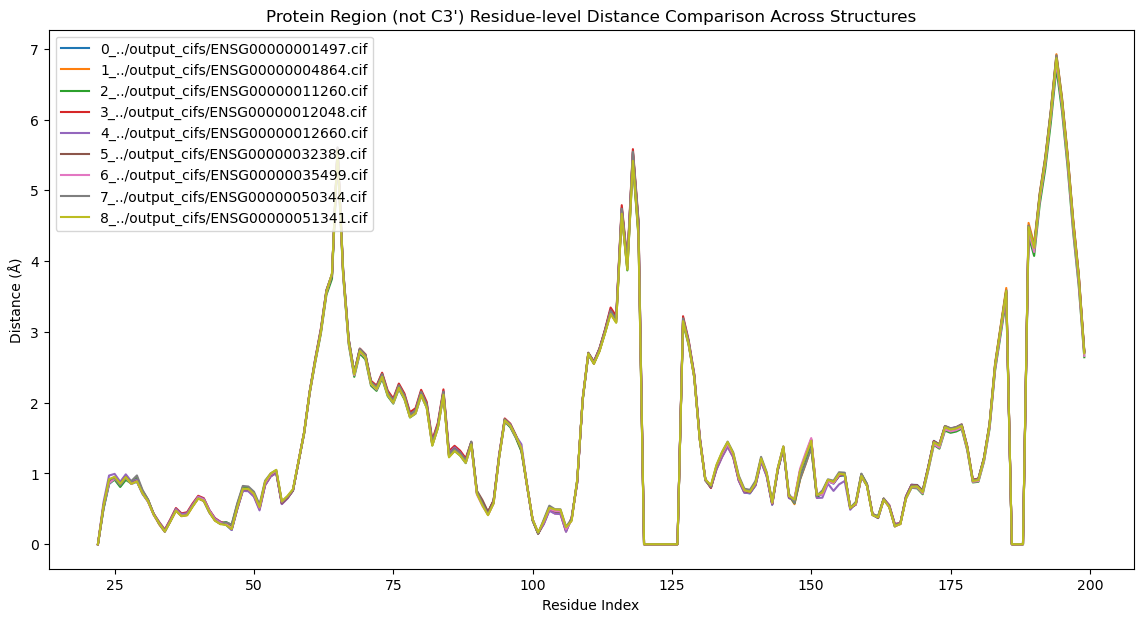

In [2]:
################# SUMS UP DIFFERENCES BETWEEN 1ST AND LAST FILE IN LIST
from pymol import cmd
import matplotlib.pyplot as plt
import os

cmd.reinitialize()
files = [



    
    # ('4f3t.cif', 'md0/step4.0_minimization_1.gro'), 
    # ('4f3t.cif', 'md0/step4.0_minimization_2.gro'),
    # ('4f3t.cif', 'md0/step4.0_minimization_3.gro'),
    # ('4f3t.cif', 'md0/step4.0_minimization_4.gro'),
    # ('4f3t.cif', 'md0/step4.0_minimization_5.gro'),
    # ('4f3t.cif', 'md0/step4.0_minimization_6.gro'),
    # ('4f3t.cif', 'md0/step4.0_minimization_7.gro'),
    # ('4f3t.cif', 'md0/step4.0_minimization_8.gro'),
    # ('4f3t.cif', 'md0/step4.0_minimization_9.gro'),
    # ('4f3t.cif', 'md0/step4.0_minimization_10.gro'),
    # ('4f3t.cif', 'md0/structure_solv_ions.gro')

#md0
    # ('4f3t.cif', 'md0/step4_updated_ENSG00000001497.gro'),
    # ('4f3t.cif', 'md0/step4_updated_ENSG00000003393.gro'),
    # ('4f3t.cif', 'md0/step4_updated_ENSG00000004864.gro'),
    # ('4f3t.cif', 'md0/step4_updated_ENSG00000011260.gro'),
    # ('4f3t.cif', 'md0/step4_updated_ENSG00000012048.gro'),
    # ('4f3t.cif', 'md0/step4_updated_ENSG00000012660.gro'),
    # ('4f3t.cif', 'md0/step4_updated_ENSG00000032389.gro'),
    # ('4f3t.cif', 'md0/step4_updated_ENSG00000035499.gro'),
    # ('4f3t.cif', 'md0/step4_updated_ENSG00000050344.gro'),
    # ('4f3t.cif', 'md0/step4_updated_ENSG00000051341.gro'),

##on cpu
    # ('4f3t.cif', 'md0/chpc095/step4_updated_ENSG00000001497.gro'),
    # ('4f3t.cif', 'md0/chpc095/step4_updated_ENSG00000003393.gro'),
    # ('4f3t.cif', 'md0/chpc095/step4_updated_ENSG00000004864.gro'),
    # ('4f3t.cif', 'md0/chpc095/step4_updated_ENSG00000011260.gro'),
    # ('4f3t.cif', 'md0/chpc095/step4_updated_ENSG00000012048.gro'),
    # ('4f3t.cif', 'md0/chpc095/step4_updated_ENSG00000012660.gro'),
    # ('4f3t.cif', 'md0/chpc095/step4_updated_ENSG00000032389.gro'),
    # ('4f3t.cif', 'md0/chpc095/step4_updated_ENSG00000035499.gro'),
    # ('4f3t.cif', 'md0/chpc095/step4_updated_ENSG00000050344.gro'),
    # ('4f3t.cif', 'md0/chpc095/step4_updated_ENSG00000051341.gro'),


# #md1 from cpu
    # ('4f3t.cif', 'md1/step4_updated_ENSG00000001497.gro'),
    # ('4f3t.cif', 'md1/step4_updated_ENSG00000003393.gro'),
    # ('4f3t.cif', 'md1/step4_updated_ENSG00000004864.gro'),
    # ('4f3t.cif', 'md1/step4_updated_ENSG00000011260.gro'),
    # ('4f3t.cif', 'md1/step4_updated_ENSG00000012048.gro'),
    # ('4f3t.cif', 'md1/step4_updated_ENSG00000012660.gro'),
    # ('4f3t.cif', 'md1/step4_updated_ENSG00000032389.gro'),
    # ('4f3t.cif', 'md1/step4_updated_ENSG00000035499.gro'),
    # ('4f3t.cif', 'md1/step4_updated_ENSG00000050344.gro'),
    # ('4f3t.cif', 'md1/step4_updated_ENSG00000051341.gro'),

    ('4f3t.cif', '../output_cifs/ENSG00000001497.cif'),
    # ('4f3t.cif', '../output_cifs/ENSG00000003393.cif'),
    ('4f3t.cif', '../output_cifs/ENSG00000004864.cif'),
    ('4f3t.cif', '../output_cifs/ENSG00000011260.cif'),
    ('4f3t.cif', '../output_cifs/ENSG00000012048.cif'),
    ('4f3t.cif', '../output_cifs/ENSG00000012660.cif'),
    ('4f3t.cif', '../output_cifs/ENSG00000032389.cif'),
    ('4f3t.cif', '../output_cifs/ENSG00000035499.cif'),
    ('4f3t.cif', '../output_cifs/ENSG00000050344.cif'),
    ('4f3t.cif', '../output_cifs/ENSG00000051341.cif')
    
## from pik3cb ENSG00000051382.cif
    # ('4f3t.cif', 'md1/output/step4.0_minimization_amide.gro'), 
    # ('4f3t.cif', 'md1/output/step4.0_minimization_gna.gro'),
    # ('4f3t.cif', 'md1/output/step4.0_minimization_unmod.gro'),
    # ('4f3t.cif', 'md0/step4.0_minimization.gro'), #unmod with 10000 steps
    # ('ENSG00000051382.cif', 'md0/step4.0_minimization_amide.gro'), 
    # ('ENSG00000051382.cif', 'md0/step4.0_minimization_gna.gro'),
    # ('ENSG00000051382.cif', 'md0/step4.0_minimization_unmod.gro'),
#1497 
    # ('4f3t.cif', 'md0/step4.0_minimization_amide_1497.gro'), 
    # ('4f3t.cif', 'md0/step4.0_minimization_gna_1497.gro'),
    # ('4f3t.cif', 'md0/step4.0_minimization_unmod_1497.gro'),

    # ('4f3t.cif', 'md0/updated_ENSG00000001497.cif'),
    # ('4f3t.cif', 'md0/updated_ENSG00000003393.cif'),
    # ('4f3t.cif', 'md0/updated_ENSG00000004864.cif'),
    # ('4f3t.cif', 'md0/updated_ENSG00000011260.cif'),
    # ('4f3t.cif', 'md0/updated_ENSG00000012048.cif'),
    # ('4f3t.cif', 'md0/updated_ENSG00000012660.cif'),
    # ('4f3t.cif', 'md0/updated_ENSG00000032389.cif'),
    # ('4f3t.cif', 'md0/updated_ENSG00000035499.cif'),
    # ('4f3t.cif', 'md0/updated_ENSG00000050344.cif'),
    # ('4f3t.cif', 'md0/updated_ENSG00000051341.cif'),



    



]
# ################################### 
# input_directory = "md0/"
# files = []
# for i, filename in enumerate(os.listdir(input_directory)):
#     # if filename.endswith(".cif"):
#     if filename.startswith("updated_ENS") and filename.endswith(".cif"):
#         # Construct the tuple and append to the `files` list
#         tuple_entry = ('4f3t.cif', os.path.join(input_directory, filename))
#         files.append(tuple_entry)
# new_files = [
#     ('4f3t.cif', 'md0/step4_updated_ENSG00000001497.gro'),
#     ('4f3t.cif', 'md0/step4_updated_ENSG00000003393.gro'),
#     ('4f3t.cif', 'md0/step4_updated_ENSG00000004864.gro'),
#     ('4f3t.cif', 'md0/step4_updated_ENSG00000011260.gro'),
#     ('4f3t.cif', 'md0/step4_updated_ENSG00000012048.gro'),
#     ('4f3t.cif', 'md0/step4_updated_ENSG00000012660.gro'),
#     ('4f3t.cif', 'md0/step4_updated_ENSG00000032389.gro'),
#     ('4f3t.cif', 'md0/step4_updated_ENSG00000035499.gro'),
#     ('4f3t.cif', 'md0/step4_updated_ENSG00000050344.gro'),
#     ('4f3t.cif', 'md0/step4_updated_ENSG00000051341.gro'),
# ]
# files.extend(new_files)
# ########################################################

# combined_index_A = list(range(22, 860))
combined_index_A = list(range(22, 200)) # noticeable
# combined_index_A = list(range(200, 400)) # negligible
# combined_index_A = list(range(400, 600)) # big impact
# combined_index_A = list(range(600, 860)) # minor

combined_distances_A = {}
index = 0 
for ref_file, comp_file in files:
    cmd.reinitialize()
    
    # print(f"Loading reference file: {ref_file}")
    # print(f"Loading comparison file: {comp_file}")
    cmd.load(ref_file, 'ref')
    cmd.load(comp_file, 'comp')

    if cmd.count_atoms('ref') == 0 or cmd.count_atoms('comp') == 0:
        print(f"Error: One of the structures failed to load: {ref_file} or {comp_file}")
        continue

    cmd.remove('solvent')
    cmd.remove('ref and resn CL')
    cmd.remove('ref and resn NA+')
    cmd.remove('ref and hydrogen')
    cmd.remove('comp and hydrogen')

    alignment_rms = cmd.align('comp', 'ref')
    # print(f"Alignment RMSD for {comp_file}: {alignment_rms}")

    cmd.select('not_C3_ref', 'ref and not byres name C3\'')
    cmd.select('not_C3_comp', 'comp and not byres name C3\'')

    ref_atom_count = cmd.count_atoms('not_C3_ref')
    comp_atom_count = cmd.count_atoms('not_C3_comp')
    # print(f"Atoms in not_C3_ref: {ref_atom_count}, Atoms in not_C3_comp: {comp_atom_count}")

    if ref_atom_count == 0 or comp_atom_count == 0:
        print(f"Error: No atoms found in one of the selections for {comp_file}")
        continue

    distances_A = []

    for i in combined_index_A:
        distance = cmd.distance(f'dist_{i}', f'not_C3_ref and resi {i} and name C', f'not_C3_comp and resi {i} and name C')
        distances_A.append(distance)

    # comp_name = os.path.basename(comp_file).replace('.', '_')
    # base_name = os.path.basename(comp_file).replace('.', '_') #this is to allow graphing of more than one file with same name
    comp_name = f"{index}_{comp_file}"
    index += 1  

    if len(distances_A) > 0:
        combined_distances_A[comp_name] = distances_A
        # print(f"Distances calculated for {comp_name}: {len(distances_A)}")
    else:
        print(f"Warning: No distances found for {comp_name}")
######################################################
pair1_key = f"0_{files[0][1]}"
pair2_key = f"{len(files) - 1}_{files[-1][1]}"

if pair1_key in combined_distances_A and pair2_key in combined_distances_A:
    distances_1 = combined_distances_A[pair1_key]
    distances_2 = combined_distances_A[pair2_key]
    if len(distances_1) == len(distances_2):
        differences = [abs(a - b) for a, b in zip(distances_1, distances_2)]
        total_sum = round(sum(differences), 1)
        print(f"Sum of differences between first and last pair: {total_sum}")
    else:
        print("Error: Distance lists have different lengths.")
else:
    print("Error: One or both files not processed correctly.")
##########################################################
plt.figure(figsize=(14, 7))
for comp_name, distances in combined_distances_A.items():
    # print(f"Plotting data for {comp_name}: {distances[:10]}...")
    plt.plot(combined_index_A, distances, label=f'{comp_name}')

plt.xlabel('Residue Index')
plt.ylabel('Distance (Å)')
plt.title("Protein Region (not C3') Residue-level Distance Comparison Across Structures")
plt.legend()
plt.show()

Average after normalization for list 0: 0.017654816309611004
Average after normalization for list 1: 0.04266780898684547
Average after normalization for list 2: 0.020310526802426294
0_md1/output/step4.0_minimization_amide.gro 
Average after normalization for 0_md1/output/step4.0_minimization_amide.gro: 0.017654816309611004
1_md1/output/step4.0_minimization_gna.gro 
Average after normalization for 1_md1/output/step4.0_minimization_gna.gro: 0.04266780898684547
2_md1/output/step4.0_minimization_unmod.gro 
Average after normalization for 2_md1/output/step4.0_minimization_unmod.gro: 0.020310526802426294


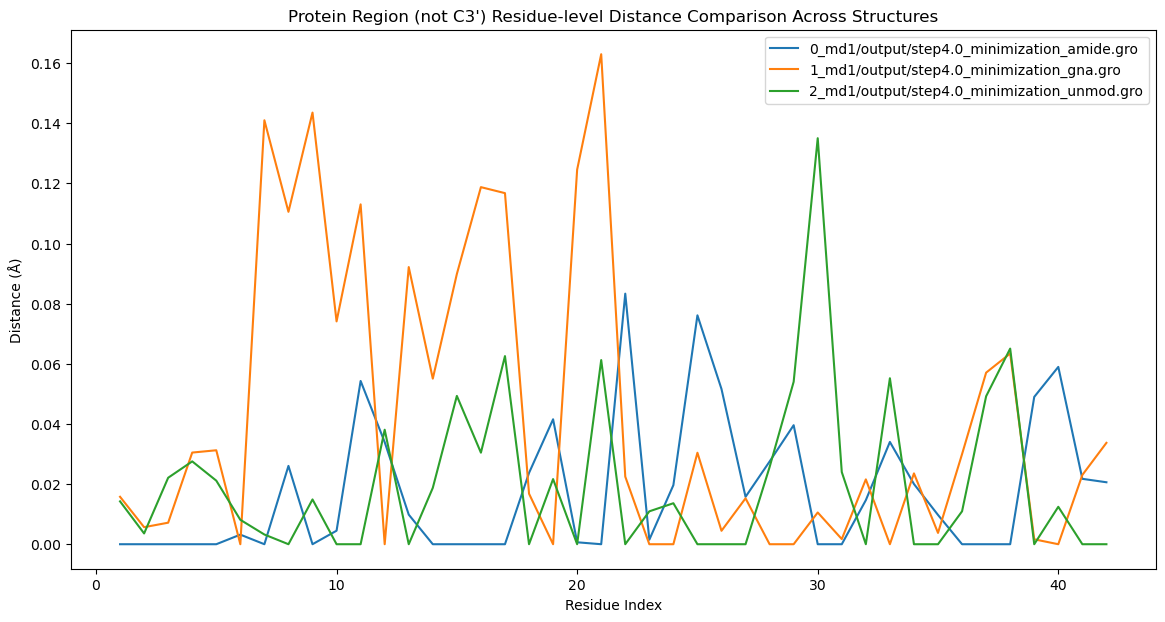

In [11]:
## GRAPHS RNA STRAND DATA 10-13-24
from pymol import cmd
import matplotlib.pyplot as plt
import os

cmd.reinitialize()
files = [

    ('../output_cifs/ENSG00000051382.cif', 'md1/output/step4.0_minimization_amide.gro'),
    ('../output_cifs/ENSG00000051382.cif', 'md1/output/step4.0_minimization_gna.gro'),
    ('../output_cifs/ENSG00000051382.cif', 'md1/output/step4.0_minimization_unmod.gro'), #unmod

]
combined_index_A = list(range(1, 43))
combined_distances_A = {}
index = 0 
for ref_file, comp_file in files:
    cmd.reinitialize()
    
    cmd.load(ref_file, 'ref')
    cmd.load(comp_file, 'comp')

    if cmd.count_atoms('ref') == 0 or cmd.count_atoms('comp') == 0:
        print(f"Error: One of the structures failed to load: {ref_file} or {comp_file}")
        continue

    cmd.remove('solvent')
    cmd.remove('ref and resn CL')
    cmd.remove('ref and resn NA+')
    cmd.remove('ref and hydrogen')
    cmd.remove('comp and hydrogen')

    alignment_rms = cmd.align('comp', 'ref')
    cmd.select("only_C3_ref", "ref and byres (name C3' or name C3G)")
    cmd.select("only_C3_comp", "comp and byres (name C3' or name C3G)")
    distances_A = []

    distances_chain_a = []
    distances_chain_b = []
    
    for resi in range(1, 22):
        cmd.select("first_rna_base_ref", f"byres (first (only_C3_ref and resi {resi}))")
        cmd.select("first_rna_base_comp", f"byres (first (only_C3_comp and resi {resi}))")
        dist_a = cmd.distance(f"dist_chain_a_resi_{resi}", "first_rna_base_ref", "first_rna_base_comp")
        distances_chain_a.append(dist_a)
    
        cmd.select("first_rna_base_ref_b", f"(only_C3_ref and resi {resi} and not first_rna_base_ref)")
        cmd.select("first_rna_base_comp_b", f"(only_C3_comp and resi {resi} and not first_rna_base_comp)")
        dist_b = cmd.distance(f"dist_chain_b_resi_{resi}", "first_rna_base_ref_b", "first_rna_base_comp_b")
        distances_chain_b.append(dist_b)

    comp_name = f"{index}_{comp_file}"
    combined_distances_A[comp_name] = distances_chain_a + distances_chain_b

    index += 1  



###################################################### normalize to the lowest change in any residue
for pair_key in combined_distances_A:
    distance_lists = list(combined_distances_A.values())
    if not distance_lists:
        continue
    num_indices = len(distance_lists[0])
    for i in range(num_indices):
        min_value = min(dist[i] for dist in distance_lists)
        for dist in distance_lists:
            dist[i] -= min_value
        #######
for idx, dist in enumerate(distance_lists):
    avg = sum(dist) / len(dist) if dist else 0
    print(f"Average after normalization for list {idx}: {avg}")
##########
for pair_key, distance_list in combined_distances_A.items():
    if not distance_list:
        continue
    avg = sum(distance_list) / len(distance_list) if distance_list else 0
    print(f"{pair_key} ")
    print(f"Average after normalization for {pair_key}: {avg}")
##########################################################
plt.figure(figsize=(14, 7))
for comp_name, distances in combined_distances_A.items():
    plt.plot(combined_index_A, distances, label=f'{comp_name}')
    # if comp_name.startswith("2_") or comp_name.startswith("3_"):
    #     plt.plot(combined_index_A, distances, label=f'{comp_name}')

plt.xlabel('Residue Index')
plt.ylabel('Distance (Å)')
plt.title("Protein Region (not C3') Residue-level Distance Comparison Across Structures")
plt.legend()
plt.show()


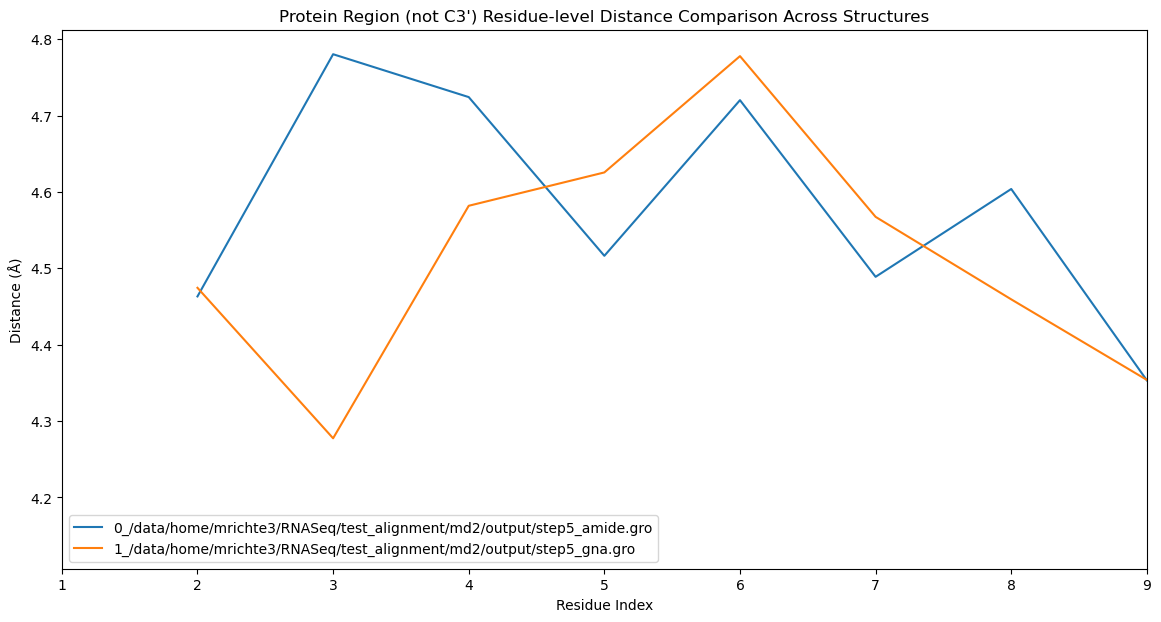

In [1]:
## GRAPHS RNA STRAND DATA 10-13-24
from pymol import cmd
import matplotlib.pyplot as plt
import os

cmd.reinitialize()
files = [

    # ('../output_cifs/ENSG00000051382.cif', '/data/home/mrichte3/RNASeq/amide/step5/ENSG00000051382.gro'),
    # ('../output_cifs/ENSG00000051382.cif', '/data/home/mrichte3/RNASeq/gna/step5/ENSG00000051382.gro'),
    ########PIK3CB
    # ('4f3t.cif', '/data/home/mrichte3/RNASeq/amide/step5/ENSG00000051382.gro'),
    # ('4f3t.cif', '/data/home/mrichte3/RNASeq/gna/step5/ENSG00000051382.gro'),
    ##########YY1
    ('/data/home/mrichte3/RNASeq/test_alignment/md/amide/6mdz_with_pik_guide_target_noh.pdb', '/data/home/mrichte3/RNASeq/test_alignment/md2/output/step5_amide.gro'),
    ('/data/home/mrichte3/RNASeq/test_alignment/md/amide/6mdz_with_pik_guide_target_noh.pdb', '/data/home/mrichte3/RNASeq/test_alignment/md2/output/step5_gna.gro'),
    # ('4f3t.cif', '/data/home/mrichte3/RNASeq/amide/step5/ENSG00000100811.gro'),
    # ('4f3t.cif', '/data/home/mrichte3/RNASeq/gna/step5/ENSG00000100811.gro'),
    ##########FADD
    # ('4f3t.cif', '/data/home/mrichte3/RNASeq/amide/step5/ENSG00000168040.gro'),
    # ('4f3t.cif', '/data/home/mrichte3/RNASeq/gna/step5/ENSG00000168040.gro'),    
    # ('../output_cifs/ENSG00000051382.cif', '/data/home/mrichte3/RNASeq/unmod/ENSG00000051382.pdb'), #unmod

]
combined_index_A = list(range(1, 43))
combined_distances_A = {}
index = 0 
for ref_file, comp_file in files:
    cmd.reinitialize()
    
    cmd.load(ref_file, 'ref')
    cmd.load(comp_file, 'comp')

    if cmd.count_atoms('ref') == 0 or cmd.count_atoms('comp') == 0:
        print(f"Error: One of the structures failed to load: {ref_file} or {comp_file}")
        continue

    cmd.remove('solvent')
    cmd.remove('ref and resn CL')
    cmd.remove('ref and resn NA+')
    cmd.remove('ref and hydrogen')
    cmd.remove('comp and hydrogen')

    alignment_rms = cmd.align('comp', 'ref')
    cmd.select("only_C3_ref", "ref and byres (name C3' or name C3G)")
    cmd.select("only_C3_comp", "comp and byres (name C3' or name C3G)")
    distances_A = []

    distances_chain_a = []
    distances_chain_b = []
    
    for resi in range(1, 22):
        cmd.select("first_rna_base_ref", f"byres (first (only_C3_ref and resi {resi}))")
        cmd.select("first_rna_base_comp", f"byres (first (only_C3_comp and resi {resi}))")
        dist_a = cmd.distance(f"dist_chain_a_resi_{resi}", "first_rna_base_ref", "first_rna_base_comp")
        distances_chain_a.append(dist_a)
    
        cmd.select("first_rna_base_ref_b", f"(only_C3_ref and resi {resi} and not first_rna_base_ref)")
        cmd.select("first_rna_base_comp_b", f"(only_C3_comp and resi {resi} and not first_rna_base_comp)")
        dist_b = cmd.distance(f"dist_chain_b_resi_{resi}", "first_rna_base_ref_b", "first_rna_base_comp_b")
        distances_chain_b.append(dist_b)

    comp_name = f"{index}_{comp_file}"
    combined_distances_A[comp_name] = distances_chain_a + distances_chain_b

    index += 1  



###################################################### normalize to the lowest change in any residue
# for pair_key in combined_distances_A:
#     distance_lists = list(combined_distances_A.values())
#     if not distance_lists:
#         continue
#     num_indices = len(distance_lists[0])
#     for i in range(num_indices):
#         min_value = min(dist[i] for dist in distance_lists)
#         for dist in distance_lists:
#             dist[i] -= min_value
#         #######
# for idx, dist in enumerate(distance_lists):
#     avg = sum(dist) / len(dist) if dist else 0
#     print(f"Average after normalization for list {idx}: {avg}")
# ##########
# for pair_key, distance_list in combined_distances_A.items():
#     if not distance_list:
#         continue
#     avg = sum(distance_list) / len(distance_list) if distance_list else 0
#     print(f"{pair_key} ")
#     print(f"Average after normalization for {pair_key}: {avg}")
########################################################## full plot
# plt.figure(figsize=(14, 7))
# for comp_name, distances in combined_distances_A.items():
#     plt.plot(combined_index_A, distances, label=f'{comp_name}')
#     # if comp_name.startswith("2_") or comp_name.startswith("3_"):
#     #     plt.plot(combined_index_A, distances, label=f'{comp_name}')

# plt.xlabel('Residue Index')
# plt.ylabel('Distance (Å)')
# plt.title("Protein Region (not C3') Residue-level Distance Comparison Across Structures")
# plt.legend()
# plt.show()
##########################################################
plt.figure(figsize=(14, 7))
for comp_name, distances in combined_distances_A.items():
    # Filter distances to include only indices between 1 and 9
    filtered_distances = [d for i, d in enumerate(distances) if 1 <= combined_index_A[i] <= 9]

    # Plot the filtered data
    plt.plot(combined_index_A[1:10], filtered_distances, label=f'{comp_name}')  # Slice to include indices 1 to 9

plt.xlabel('Residue Index')
plt.ylabel('Distance (Å)')
plt.title("Protein Region (not C3') Residue-level Distance Comparison Across Structures")
plt.legend()
plt.xlim(1, 9)  # Set explicit x-axis limits for clarity (optional)
plt.show()

In [ ]:
################# LASTEST DISTANCES FOR PROTEIN. ONLYL GOING TO RESI 400!! SELECTS 30 STRUCTURES AT RANDOM, 10 EACH FROM CIFS, AMIDE, GNA
from pymol import cmd
import matplotlib.pyplot as plt
import os
import random

cmd.reinitialize()
###################################
directories = ["../output_cifs", "complete_md_amide", "complete_md_gna"]
files = []

for directory in directories:
    if os.path.isdir(directory):
        eligible_files = [f for f in os.listdir(directory) if f.endswith(('.cif', '.gro'))]
        selected_files = random.sample(eligible_files, min(10, len(eligible_files)))
        
        for ef in selected_files:
            files.append(('4f3t.cif', os.path.join(directory, ef)))


#####################

# combined_index_A = list(range(22, 860))
combined_index_A = list(range(22, 400))
combined_distances_A = {}
index = 0 
for ref_file, comp_file in files:
    cmd.reinitialize()
    
    print(f"Loading reference file: {ref_file}")
    print(f"Loading comparison file: {comp_file}")
    cmd.load(ref_file, 'ref')
    cmd.load(comp_file, 'comp')

    if cmd.count_atoms('ref') == 0 or cmd.count_atoms('comp') == 0:
        print(f"Error: One of the structures failed to load: {ref_file} or {comp_file}")
        continue

    cmd.remove('solvent')
    cmd.remove('ref and resn CL')
    cmd.remove('ref and resn NA+')
    cmd.remove('ref and hydrogen')
    cmd.remove('comp and hydrogen')

    alignment_rms = cmd.align('comp', 'ref')
    print(f"Alignment RMSD for {comp_file}: {alignment_rms}")

    cmd.select('not_C3_ref', 'ref and not byres name C3\'')
    cmd.select('not_C3_comp', 'comp and not byres name C3\'')

    ref_atom_count = cmd.count_atoms('not_C3_ref')
    comp_atom_count = cmd.count_atoms('not_C3_comp')
    print(f"Atoms in not_C3_ref: {ref_atom_count}, Atoms in not_C3_comp: {comp_atom_count}")

    if ref_atom_count == 0 or comp_atom_count == 0:
        print(f"Error: No atoms found in one of the selections for {comp_file}")
        continue

    distances_A = []

    for i in combined_index_A:
        distance = cmd.distance(f'dist_{i}', f'not_C3_ref and resi {i} and name C', f'not_C3_comp and resi {i} and name C')
        distances_A.append(distance)

    # comp_name = os.path.basename(comp_file).replace('.', '_')
    # base_name = os.path.basename(comp_file).replace('.', '_') #this is to allow graphing of more than one file with same name
    comp_name = f"{index}_{comp_file}"
    index += 1  

    if len(distances_A) > 0:
        combined_distances_A[comp_name] = distances_A
        print(f"Distances calculated for {comp_name}: {len(distances_A)}")
    else:
        print(f"Warning: No distances found for {comp_name}")

plt.figure(figsize=(14, 7))
for comp_name, distances in combined_distances_A.items():
    print(f"Plotting data for {comp_name}: {distances[:10]}...")
    plt.plot(combined_index_A, distances, label=f'{comp_name}')

plt.xlabel('Residue Index')
plt.ylabel('Distance (Å)')
plt.title("Protein Region (not C3') Residue-level Distance Comparison Across Structures")
# plt.legend()
plt.show()

complete_md_amide/step5_ENSG00000001497.gro
complete_md_amide/step5_ENSG00000003393.gro
complete_md_amide/step5_ENSG00000004864.gro
complete_md_amide/step5_ENSG00000072163.gro
complete_md_amide/step5_ENSG00000100644.gro
complete_md_amide/step5_ENSG00000108433.gro
complete_md_amide/step5_ENSG00000108932.gro
complete_md_amide/step5_ENSG00000117395.gro
complete_md_amide/step5_ENSG00000117461.gro
complete_md_amide/step5_ENSG00000136319.gro
complete_md_amide/step5_ENSG00000136521.gro
complete_md_amide/step5_ENSG00000143797.gro
complete_md_amide/step5_ENSG00000170390.gro
complete_md_amide/step5_ENSG00000170537.gro
complete_md_amide/step5_ENSG00000170571.gro
complete_md_amide/step5_ENSG00000189007.gro
complete_md_amide/step5_ENSG00000189042.gro
complete_md_amide/step5_ENSG00000189221.gro
complete_md_amide/step5_ENSG00000221909.gro


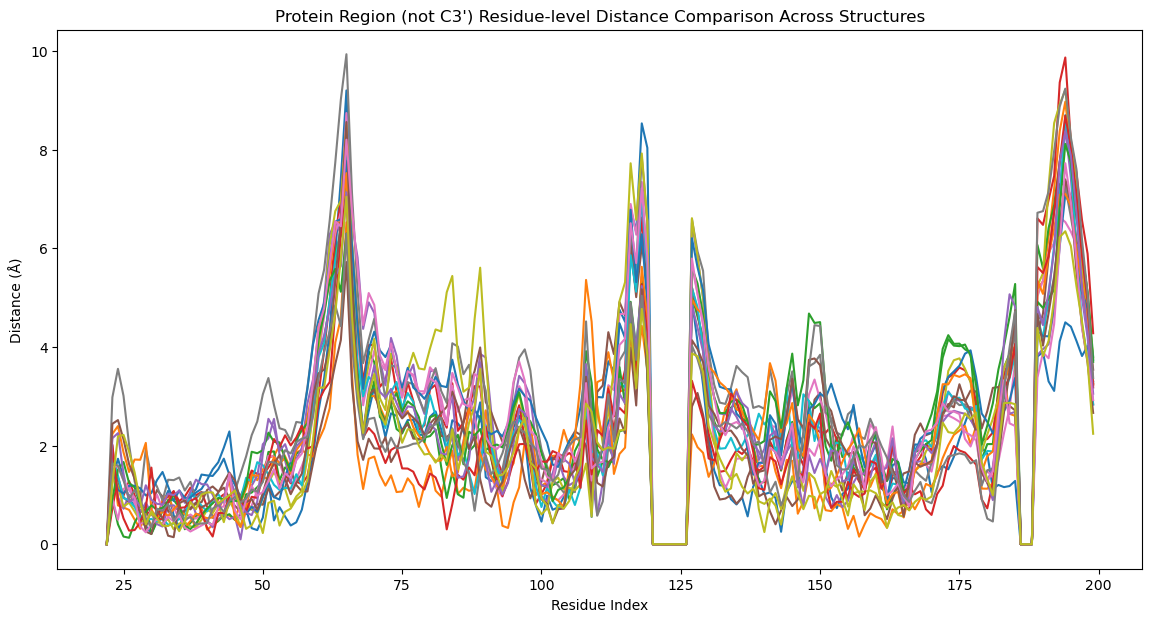

In [53]:
################# LASTEST DISTANCES FOR PROTEIN. Prints all structures matched AUCUCCUAAUGCUAUCCCUCC. ALL THE SAME
from pymol import cmd
import matplotlib.pyplot as plt
import os
import csv
import random

cmd.reinitialize()
####################################################ALL STRUCTURES ARE IDENTICAL FROM CHAI
# csv_file = "../gene_alignments3.csv"
# sequence_to_match = "AUCUCCUAAUGCUAUCCCUCC"
# output_directory = "../output_cifs"
# files = []

# with open(csv_file, newline='', encoding='utf-8') as csvfile:
#     reader = csv.DictReader(csvfile)
#     for row in reader:
#         if row['target_rna'] == sequence_to_match:
#             ensembl_id = row['ensembl_id']
#             cif_file = os.path.join(output_directory, f"{ensembl_id}.cif")
#             if os.path.exists(cif_file):
#                 files.append(('4f3t.cif', cif_file))
#####################################################
csv_file = "../gene_alignments3.csv"
sequence_to_match = "AUCUCCUAAUGCUAUCCCUCC"
output_directory = "complete_md_amide"
files = []

with open(csv_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['target_rna'] == sequence_to_match:
            ensembl_id = row['ensembl_id']
            gro_file = os.path.join(output_directory, f"step5_{ensembl_id}.gro")
            if os.path.exists(gro_file):
                files.append(('4f3t.cif', gro_file))
                print(gro_file)
##############################################################

# combined_index_A = list(range(22, 860))
combined_index_A = list(range(22, 200)) ## 200 - 400
combined_distances_A = {}
index = 0 
for ref_file, comp_file in files:
    cmd.reinitialize()
    
    cmd.load(ref_file, 'ref')
    cmd.load(comp_file, 'comp')

    if cmd.count_atoms('ref') == 0 or cmd.count_atoms('comp') == 0:
        print(f"Error: One of the structures failed to load: {ref_file} or {comp_file}")
        continue

    cmd.remove('solvent')
    cmd.remove('ref and resn CL')
    cmd.remove('ref and resn NA+')
    cmd.remove('ref and hydrogen')
    cmd.remove('comp and hydrogen')

    alignment_rms = cmd.align('comp', 'ref')

    cmd.select('not_C3_ref', 'ref and not byres name C3\'')
    cmd.select('not_C3_comp', 'comp and not byres name C3\'')

    ref_atom_count = cmd.count_atoms('not_C3_ref')
    comp_atom_count = cmd.count_atoms('not_C3_comp')

    if ref_atom_count == 0 or comp_atom_count == 0:
        print(f"Error: No atoms found in one of the selections for {comp_file}")
        continue

    distances_A = []

    for i in combined_index_A:
        distance = cmd.distance(f'dist_{i}', f'not_C3_ref and resi {i} and name C', f'not_C3_comp and resi {i} and name C')
        distances_A.append(distance)

    # comp_name = os.path.basename(comp_file).replace('.', '_')
    # base_name = os.path.basename(comp_file).replace('.', '_') #this is to allow graphing of more than one file with same name
    comp_name = f"{index}_{comp_file}"
    index += 1  

    if len(distances_A) > 0:
        combined_distances_A[comp_name] = distances_A
    else:
        print(f"Warning: No distances found for {comp_name}")

plt.figure(figsize=(14, 7))
for comp_name, distances in combined_distances_A.items():
    plt.plot(combined_index_A, distances, label=f'{comp_name}')

plt.xlabel('Residue Index')
plt.ylabel('Distance (Å)')
plt.title("Protein Region (not C3') Residue-level Distance Comparison Across Structures")
# plt.legend()
plt.show()

In [ ]:
################# PLOTS DIFFERENCES BETWEEN AMIDE AND GNA. DELTA DELTA, ALL FILES IN DIIR
from pymol import cmd
import matplotlib.pyplot as plt
import os

cmd.reinitialize()
# files = [
#     # ('ref174780.cif', 'ENSG00000174780.cif'),
#     # ('ENSG00000174780.cif', 'step4.0_minimization.gro'),
#     # ('PIK3CB_guide_target.cif', 'step4.0_minimization.gro'),
#     ('PIK3CB_guide_target.cif', 'complete_md_amide/step5_ENSG00000000003.gro'),
#     # ('PIK3CB_guide_target.cif', 'md/step5_amide_001_ENSG00000174780.gro'),
#     ('PIK3CB_guide_target.cif', 'complete_md_gna/step5_ENSG00000000003.gro'),

#     ##contains amideRNASeq/test_alignment/ref174780.cif
#     # ('PIK3CB_guide_target.cif', 'backup/step5_50000_iterations.gro'),
#     # ('PIK3CB_guide_target.cif', 'backup/step5_100000_iterations.gro'),
#     # ('PIK3CB_guide_target.cif', 'backup/step5_150000_iterations.gro'),
#     # ('PIK3CB_guide_target.cif', 'backup/step5_200000_iterations.gro'),
#     # #contains mismatch pos 7
#     # ('PIK3CB_guide_target.cif', 'step5_50000_iterations.gro'),
#     # ('PIK3CB_guide_target.cif', 'step5_100000_iterations.gro'),
#     # ('PIK3CB_guide_target.cif', 'step5_150000_iterations.gro'),
#     # ('PIK3CB_guide_target.cif', 'step5_200000_iterations.gro'),
# ]
# Directories to compare############################################
set_number = 1
amide_dir = 'complete_md_amide'
gna_dir = 'complete_md_gna'
reference_file = 'PIK3CB_guide_target.cif'
start_index = (set_number - 1) * 3
def filter_gro_files(directory):
    return [f for f in sorted(os.listdir(directory)) if f.endswith('.gro') and os.path.isfile(os.path.join(directory, f))]
amide_files = filter_gro_files(amide_dir)
gna_files = filter_gro_files(gna_dir)
amide_set = amide_files[start_index:start_index + 3]
gna_set = gna_files[start_index:start_index + 3]
files = []
for amide_file in amide_set:
    amide_path = os.path.join(amide_dir, amide_file)
    if os.path.exists(amide_path):
        files.append((reference_file, amide_path))
for gna_file in gna_set:
    gna_path = os.path.join(gna_dir, gna_file)
    if os.path.exists(gna_path):
        files.append((reference_file, gna_path))
##########################################################################

combined_index_A = list(range(1, 860))
combined_distances_A = {}
index = 0 
for ref_file, comp_file in files:
    cmd.reinitialize()
    
    print(f"Loading reference file: {ref_file}")
    print(f"Loading comparison file: {comp_file}")
    cmd.load(ref_file, 'ref')
    cmd.load(comp_file, 'comp')

    if cmd.count_atoms('ref') == 0 or cmd.count_atoms('comp') == 0:
        print(f"Error: One of the structures failed to load: {ref_file} or {comp_file}")
        continue

    cmd.remove('solvent')
    cmd.remove('ref and resn CL')
    cmd.remove('ref and resn NA+')
    cmd.remove('ref and hydrogen')
    cmd.remove('comp and hydrogen')

    alignment_rms = cmd.align('comp', 'ref')
    print(f"Alignment RMSD for {comp_file}: {alignment_rms}")

    cmd.select('not_C3_ref', 'ref and not byres name C3\'')
    cmd.select('not_C3_comp', 'comp and not byres name C3\'')

    ref_atom_count = cmd.count_atoms('not_C3_ref')
    comp_atom_count = cmd.count_atoms('not_C3_comp')
    print(f"Atoms in not_C3_ref: {ref_atom_count}, Atoms in not_C3_comp: {comp_atom_count}")

    if ref_atom_count == 0 or comp_atom_count == 0:
        print(f"Error: No atoms found in one of the selections for {comp_file}")
        continue

    distances_A = []

    for i in combined_index_A:
        distance = cmd.distance(f'dist_{i}', f'not_C3_ref and resi {i} and name C', f'not_C3_comp and resi {i} and name C')
        # distance = round(distance, 4)
        distances_A.append(distance)

    # comp_name = os.path.basename(comp_file).replace('.', '_')
    base_name = os.path.basename(comp_file).replace('.', '_') #this is to allow graphing of more than one file with same name
    comp_name = f"{base_name}_{index}"
    index += 1  

    if len(distances_A) > 0:
        combined_distances_A[comp_name] = distances_A
        print(f"Distances calculated for {comp_name}: {len(distances_A)}")
    else:
        print(f"Warning: No distances found for {comp_name}")
#########################################FINDING DELTAS?
deltas = {}
processed_comps = set()
for comp_name1, distances1 in list(combined_distances_A.items()):
    base1, idx1 = '_'.join(comp_name1.split('_')[:-1]), int(comp_name1.split('_')[-1])

    for comp_name2, distances2 in list(combined_distances_A.items()):
        base2, idx2 = '_'.join(comp_name2.split('_')[:-1]), int(comp_name2.split('_')[-1])

        if base1 == base2 and idx1 < idx2 and comp_name1 not in processed_comps and comp_name2 not in processed_comps:
            delta_name = f"Delta_{comp_name1}_{comp_name2}"
            delta_distances = [d1 - d2 for d1, d2 in zip(distances1, distances2)]
            deltas[delta_name] = delta_distances
            processed_comps.update([comp_name1, comp_name2])
            combined_distances_A.pop(comp_name1, None)
            combined_distances_A.pop(comp_name2, None)

combined_distances_A.update(deltas)
##############################################################################
plt.figure(figsize=(14, 7))
for comp_name, distances in combined_distances_A.items():
    print(f"Plotting data for {comp_name}: {distances[:10]}...")
    plt.plot(combined_index_A, distances, label=f'{comp_name} Residue-level Distance')

plt.xlabel('Residue Index')
plt.ylabel('Distance (Å)')
plt.title("Protein Region (not C3') Residue-level Distance Comparison Across Structures")
plt.legend()
plt.show()

Loading reference file: 4f3t.cif
Loading comparison file: complete_md_amide/step5_ENSG00000000003.gro
Alignment RMSD for complete_md_amide/step5_ENSG00000000003.gro: (2.7525994777679443, 3772, 5, 6.562320709228516, 4494, 4597.5, 873)
Atoms in not_C3_ref: 6510, Atoms in not_C3_comp: 7206
Distances calculated for step5_ENSG00000000003_gro_0: 859
Loading reference file: 4f3t.cif
Loading comparison file: complete_md_amide/step5_ENSG00000000419.gro
Alignment RMSD for complete_md_amide/step5_ENSG00000000419.gro: (2.3091318607330322, 3472, 5, 6.204355716705322, 4481, 4590.5, 871)
Atoms in not_C3_ref: 6510, Atoms in not_C3_comp: 7212
Distances calculated for step5_ENSG00000000419_gro_1: 859
Loading reference file: 4f3t.cif
Loading comparison file: complete_md_amide/step5_ENSG00000000457.gro
Alignment RMSD for complete_md_amide/step5_ENSG00000000457.gro: (2.275315046310425, 3473, 5, 7.190046787261963, 4497, 4595.5, 873)
Atoms in not_C3_ref: 6510, Atoms in not_C3_comp: 7210
Distances calculated 

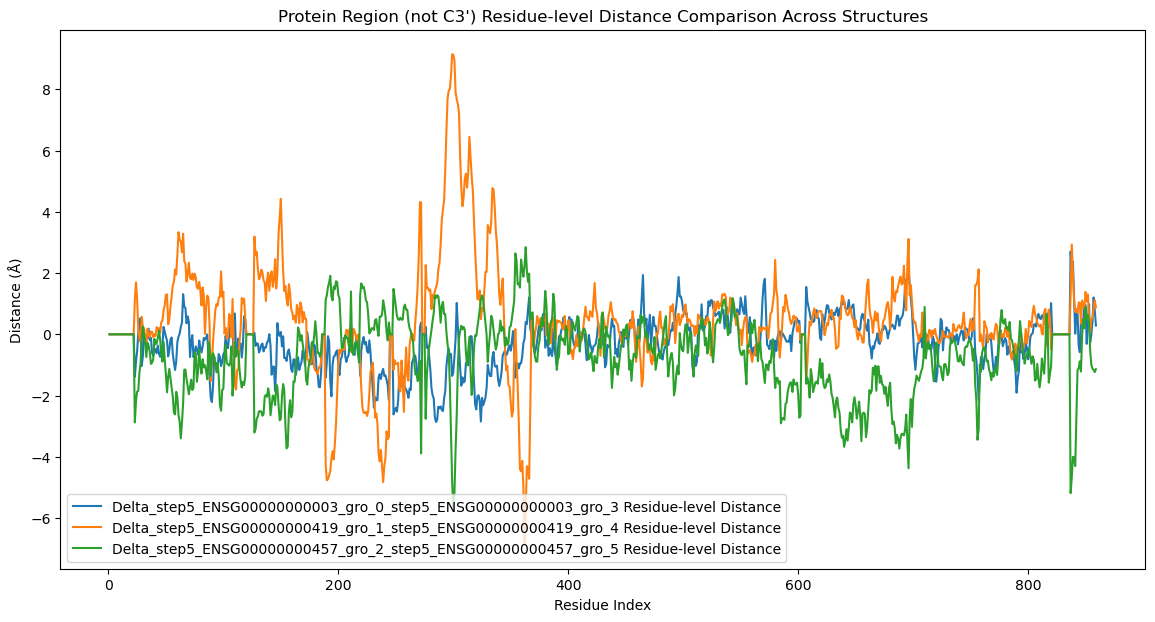

In [37]:
################# PLOTS DIFFERENCES BETWEEN AMIDE AND GNA. DELTA DELTA, ALL FILES IN DIIR
from pymol import cmd
import matplotlib.pyplot as plt
import os

cmd.reinitialize()
# files = [
#     # ('ref174780.cif', 'ENSG00000174780.cif'),
#     # ('ENSG00000174780.cif', 'step4.0_minimization.gro'),
#     # ('PIK3CB_guide_target.cif', 'step4.0_minimization.gro'),
#     ('PIK3CB_guide_target.cif', 'complete_md_amide/step5_ENSG00000000003.gro'),
#     # ('PIK3CB_guide_target.cif', 'md/step5_amide_001_ENSG00000174780.gro'),
#     ('PIK3CB_guide_target.cif', 'complete_md_gna/step5_ENSG00000000003.gro'),

#     ##contains amideRNASeq/test_alignment/ref174780.cif
#     # ('PIK3CB_guide_target.cif', 'backup/step5_50000_iterations.gro'),
#     # ('PIK3CB_guide_target.cif', 'backup/step5_100000_iterations.gro'),
#     # ('PIK3CB_guide_target.cif', 'backup/step5_150000_iterations.gro'),
#     # ('PIK3CB_guide_target.cif', 'backup/step5_200000_iterations.gro'),
#     # #contains mismatch pos 7
#     # ('PIK3CB_guide_target.cif', 'step5_50000_iterations.gro'),
#     # ('PIK3CB_guide_target.cif', 'step5_100000_iterations.gro'),
#     # ('PIK3CB_guide_target.cif', 'step5_150000_iterations.gro'),
#     # ('PIK3CB_guide_target.cif', 'step5_200000_iterations.gro'),
# ]
# Directories to compare############################################
set_number = 1
amide_dir = 'complete_md_amide'
gna_dir = 'complete_md_gna'
reference_file = '4f3t.cif'
start_index = (set_number - 1) * 3
def filter_gro_files(directory):
    return [f for f in sorted(os.listdir(directory)) if f.endswith('.gro') and os.path.isfile(os.path.join(directory, f))]
amide_files = filter_gro_files(amide_dir)
gna_files = filter_gro_files(gna_dir)
amide_set = amide_files[start_index:start_index + 3]
gna_set = gna_files[start_index:start_index + 3]
files = []
for amide_file in amide_set:
    amide_path = os.path.join(amide_dir, amide_file)
    if os.path.exists(amide_path):
        files.append((reference_file, amide_path))
for gna_file in gna_set:
    gna_path = os.path.join(gna_dir, gna_file)
    if os.path.exists(gna_path):
        files.append((reference_file, gna_path))
##########################################################################

combined_index_A = list(range(1, 860))
combined_distances_A = {}
index = 0 
for ref_file, comp_file in files:
    cmd.reinitialize()
    
    print(f"Loading reference file: {ref_file}")
    print(f"Loading comparison file: {comp_file}")
    cmd.load(ref_file, 'ref')
    cmd.load(comp_file, 'comp')

    if cmd.count_atoms('ref') == 0 or cmd.count_atoms('comp') == 0:
        print(f"Error: One of the structures failed to load: {ref_file} or {comp_file}")
        continue

    cmd.remove('solvent')
    cmd.remove('ref and resn CL')
    cmd.remove('ref and resn NA+')
    cmd.remove('ref and hydrogen')
    cmd.remove('comp and hydrogen')

    alignment_rms = cmd.align('comp', 'ref')
    print(f"Alignment RMSD for {comp_file}: {alignment_rms}")

    cmd.select('not_C3_ref', 'ref and not byres name C3\'')
    cmd.select('not_C3_comp', 'comp and not byres name C3\'')

    ref_atom_count = cmd.count_atoms('not_C3_ref')
    comp_atom_count = cmd.count_atoms('not_C3_comp')
    print(f"Atoms in not_C3_ref: {ref_atom_count}, Atoms in not_C3_comp: {comp_atom_count}")

    if ref_atom_count == 0 or comp_atom_count == 0:
        print(f"Error: No atoms found in one of the selections for {comp_file}")
        continue

    distances_A = []

    for i in combined_index_A:
        distance = cmd.distance(f'dist_{i}', f'not_C3_ref and resi {i} and name C', f'not_C3_comp and resi {i} and name C')
        # distance = round(distance, 4)
        distances_A.append(distance)

    # comp_name = os.path.basename(comp_file).replace('.', '_')
    base_name = os.path.basename(comp_file).replace('.', '_') #this is to allow graphing of more than one file with same name
    comp_name = f"{base_name}_{index}"
    index += 1  

    if len(distances_A) > 0:
        combined_distances_A[comp_name] = distances_A
        print(f"Distances calculated for {comp_name}: {len(distances_A)}")
    else:
        print(f"Warning: No distances found for {comp_name}")
#########################################FINDING DELTAS?
deltas = {}
processed_comps = set()
for comp_name1, distances1 in list(combined_distances_A.items()):
    base1, idx1 = '_'.join(comp_name1.split('_')[:-1]), int(comp_name1.split('_')[-1])

    for comp_name2, distances2 in list(combined_distances_A.items()):
        base2, idx2 = '_'.join(comp_name2.split('_')[:-1]), int(comp_name2.split('_')[-1])

        if base1 == base2 and idx1 < idx2 and comp_name1 not in processed_comps and comp_name2 not in processed_comps:
            delta_name = f"Delta_{comp_name1}_{comp_name2}"
            delta_distances = [d1 - d2 for d1, d2 in zip(distances1, distances2)]
            deltas[delta_name] = delta_distances
            processed_comps.update([comp_name1, comp_name2])
            combined_distances_A.pop(comp_name1, None)
            combined_distances_A.pop(comp_name2, None)

combined_distances_A.update(deltas)
##############################################################################
plt.figure(figsize=(14, 7))
for comp_name, distances in combined_distances_A.items():
    print(f"Plotting data for {comp_name}: {distances[:10]}...")
    plt.plot(combined_index_A, distances, label=f'{comp_name} Residue-level Distance')

plt.xlabel('Residue Index')
plt.ylabel('Distance (Å)')
plt.title("Protein Region (not C3') Residue-level Distance Comparison Across Structures")
plt.legend()
plt.show()

In [ ]:
# WORKS ALSO I THINK
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt
import os

cmd.reinitialize()
files = [
    ('PIK3CB_guide_target.cif', 'ENSG00000174780.cif'),
    ('PIK3CB_guide_target.cif', 'ENSG00000174780.pdb'),
##contains amide
    ('PIK3CB_guide_target.cif', 'backup/step5_50000_iterations.gro'),
    ('PIK3CB_guide_target.cif', 'backup/step5_100000_iterations.gro'),
    ('PIK3CB_guide_target.cif', 'backup/step5_150000_iterations.gro'),
    ('PIK3CB_guide_target.cif', 'backup/step5_200000_iterations.gro'),
##contains mismatch pos 7
    # ('PIK3CB_guide_target.cif', 'step5_50000_iterations.gro'),
    # ('PIK3CB_guide_target.cif', 'step5_100000_iterations.gro'),
    # ('PIK3CB_guide_target.cif', 'step5_150000_iterations.gro'),
    # ('PIK3CB_guide_target.cif', 'step5_200000_iterations.gro'),
]


combined_index_A = list(range(1, 860))
combined_distances_A = {}

for ref_file, comp_file in files:
    cmd.reinitialize()
    
    print(f"Loading reference file: {ref_file}")
    print(f"Loading comparison file: {comp_file}")
    cmd.load(ref_file, 'ref')
    cmd.load(comp_file, 'comp')

    if cmd.count_atoms('ref') == 0 or cmd.count_atoms('comp') == 0:
        print(f"Error: One of the structures failed to load: {ref_file} or {comp_file}")
        continue

    cmd.remove('solvent')
    cmd.remove('ref and resn CL')
    cmd.remove('ref and resn NA+')
    cmd.remove('ref and hydrogen')
    cmd.remove('comp and hydrogen')

    alignment_rms = cmd.align('comp', 'ref')
    print(f"Alignment RMSD for {comp_file}: {alignment_rms}")

    cmd.select('not_C3_ref', 'ref and not byres name C3\'')
    cmd.select('not_C3_comp', 'comp and not byres name C3\'')

    ref_atom_count = cmd.count_atoms('not_C3_ref')
    comp_atom_count = cmd.count_atoms('not_C3_comp')
    print(f"Atoms in not_C3_ref: {ref_atom_count}, Atoms in not_C3_comp: {comp_atom_count}")

    if ref_atom_count == 0 or comp_atom_count == 0:
        print(f"Error: No atoms found in one of the selections for {comp_file}")
        continue

    distances_A = []

    for i in combined_index_A:
        distance = cmd.distance(f'dist_{i}', f'not_C3_ref and resi {i}', f'not_C3_comp and resi {i}')
        distances_A.append(distance)

    comp_name = os.path.basename(comp_file).replace('.', '_')

    if len(distances_A) > 0:
        combined_distances_A[comp_name] = distances_A
        print(f"Distances calculated for {comp_name}: {len(distances_A)}")
    else:
        print(f"Warning: No distances found for {comp_name}")

plt.figure(figsize=(14, 7))
for comp_name, distances in combined_distances_A.items():
    plt.plot(combined_index_A, distances, label=f'{comp_name} Residue-level Distance')

plt.xlabel('Residue Index')
plt.ylabel('Distance (Å)')
plt.title("Protein Region (not C3') Residue-level Distance Comparison Across Structures")
plt.legend()
plt.show()


Loading reference file: ENSG00000051382.cif
Loading comparison file: md0/c_amide/step5_1.gro
Loading reference file: ENSG00000051382.cif
Loading comparison file: md0/c_gna/step5_1.gro
Loading reference file: ENSG00000051382.cif
Loading comparison file: md0/c_unmod/step5_1.gro


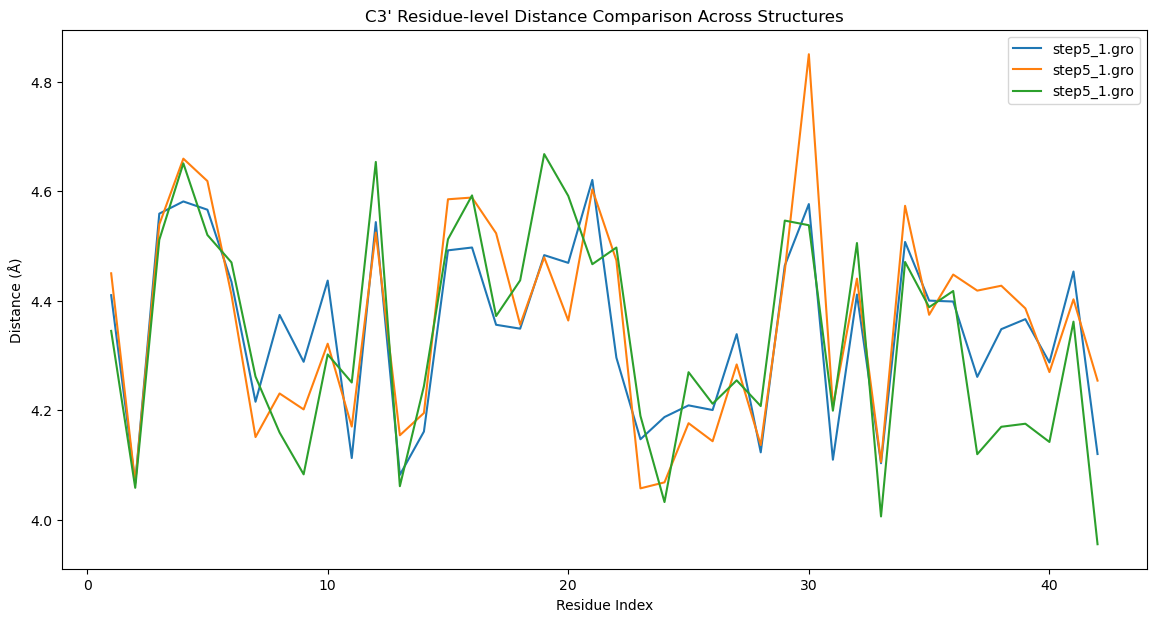

In [8]:
## GRAPHS RNA STRAND DATA
from pymol import cmd
import matplotlib.pyplot as plt
import os
cmd.reinitialize()

files = [
    ('ENSG00000051382.cif', 'md0/c_amide/step5_1.gro'),
    ('ENSG00000051382.cif', 'md0/c_gna/step5_1.gro'),
    # ('ENSG00000051382.cif', 'md0/c_gna_7m/step5_1.gro'),
    ('ENSG00000051382.cif', 'md0/c_unmod/step5_1.gro'),    
##contains amide
    # ('PIK3CB_guide_target.cif', 'backup/step5_50000_iterations.gro'),
    # ('PIK3CB_guide_target.cif', 'backup/step5_100000_iterations.gro'),
    # ('PIK3CB_guide_target.cif', 'backup/step5_150000_iterations.gro'),
    # ('PIK3CB_guide_target.cif', 'backup/step5_200000_iterations.gro'),
##contains mismatch pos 7
    # ('PIK3CB_guide_target.cif', 'step5_50000_iterations.gro'),
    # ('PIK3CB_guide_target.cif', 'step5_100000_iterations.gro'),
    # ('PIK3CB_guide_target.cif', 'step5_150000_iterations.gro'),
    # ('PIK3CB_guide_target.cif', 'step5_200000_iterations.gro'),
]

def calculate_distances():
    distances_chain_a = []
    distances_chain_b = []
    
    for resi in range(1, 22):
        cmd.select("first_rna_base_ref", f"byres (first (only_C3_ref and resi {resi}))")
        cmd.select("first_rna_base_comp", f"byres (first (only_C3_comp and resi {resi}))")
        dist_a = cmd.distance(f"dist_chain_a_resi_{resi}", "first_rna_base_ref", "first_rna_base_comp")
        distances_chain_a.append(dist_a)
        
        cmd.select("first_rna_base_ref_b", f"(only_C3_ref and resi {resi} and not first_rna_base_ref)")
        cmd.select("first_rna_base_comp_b", f"(only_C3_comp and resi {resi} and not first_rna_base_comp)")
        dist_b = cmd.distance(f"dist_chain_b_resi_{resi}", "first_rna_base_ref_b", "first_rna_base_comp_b")
        distances_chain_b.append(dist_b)
    
    return distances_chain_a + distances_chain_b

def perform_analysis(ref_file, comp_file):
    cmd.reinitialize()
    print(f"Loading reference file: {ref_file}")
    print(f"Loading comparison file: {comp_file}")
    cmd.load(ref_file, 'ref')
    cmd.load(comp_file, 'comp')

    cmd.remove('solvent')
    cmd.remove('ref and resn CL')
    cmd.remove('ref and resn NA+')
    cmd.remove('ref and hydrogen')
    cmd.remove('comp and hydrogen')

    cmd.align('comp', 'ref')
    # cmd.select("only_C3_ref", "ref and byres name C3'")
    # cmd.select("only_C3_comp", "comp and byres name C3'")
    cmd.select("only_C3_ref", "ref and byres (name C3' or name C3G)")
    cmd.select("only_C3_comp", "comp and byres (name C3' or name C3G)")
    
    distances_combined = calculate_distances()
    num_residues = len(distances_combined)
    
    plt.plot(range(1, num_residues + 1), distances_combined, label=os.path.basename(comp_file))

plt.figure(figsize=(14, 7))
for ref_file, comp_file in files:
    perform_analysis(ref_file, comp_file)

plt.xlabel('Residue Index')
plt.ylabel('Distance (Å)')
plt.title("C3' Residue-level Distance Comparison Across Structures")
plt.legend()
plt.show()

In [ ]:
# ALSO WORKS?
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt
import os

cmd.reinitialize()

files = [
    ('PIK3CB_guide_target.cif', 'ENSG00000174780.cif'),
    ('PIK3CB_guide_target.cif', 'ENSG00000174780.pdb'),
    ('PIK3CB_guide_target.cif', 'step5_100000_iterations.gro'),
    ('PIK3CB_guide_target.cif', 'step5_150000_iterations.gro'),
    ('PIK3CB_guide_target.cif', 'step5_200000_iterations.gro'),
]

combined_index_A = list(range(1, 860))
combined_distances_A = {}
combined_distances_C3 = {}  # Store distances for C3' atoms

for ref_file, comp_file in files:
    cmd.reinitialize()
    
    print(f"Loading reference file: {ref_file}")
    print(f"Loading comparison file: {comp_file}")
    cmd.load(ref_file, 'ref')
    cmd.load(comp_file, 'comp')

    if cmd.count_atoms('ref') == 0 or cmd.count_atoms('comp') == 0:
        print(f"Error: One of the structures failed to load: {ref_file} or {comp_file}")
        continue

    cmd.remove('solvent')
    cmd.remove('ref and resn CL')
    cmd.remove('ref and resn NA+')
    cmd.remove('ref and hydrogen')
    cmd.remove('comp and hydrogen')

    alignment_rms = cmd.align('comp', 'ref')
    print(f"Alignment RMSD for {comp_file}: {alignment_rms}")

    cmd.select('not_C3_ref', 'ref and not byres name C3\'')
    cmd.select('not_C3_comp', 'comp and not byres name C3\'')
    cmd.select('only_C3_ref', 'ref and byres name C3\'')
    cmd.select('only_C3_comp', 'comp and byres name C3\'')

    ref_atom_count = cmd.count_atoms('not_C3_ref')
    comp_atom_count = cmd.count_atoms('not_C3_comp')
    ref_atom_count_only_C3_ref = cmd.count_atoms('only_C3_ref')
    comp_atom_count_only_C3_comp = cmd.count_atoms('only_C3_comp')
    print(f"Atoms in not_C3_ref: {ref_atom_count}, Atoms in not_C3_comp: {comp_atom_count}")
    print(f"Atoms in C3_ref: {ref_atom_count_only_C3_ref}, Atoms in C3_comp: {comp_atom_count_only_C3_comp}")
    
    if ref_atom_count == 0 or comp_atom_count == 0:
        print(f"Error: No atoms found in one of the selections for {comp_file}")
        continue

    distances_A = []
    distances_C3 = []

    for i in combined_index_A:
        distance = cmd.distance(f'dist_{i}', f'not_C3_ref and resi {i}', f'not_C3_comp and resi {i}')
        distances_A.append(distance)

        distance_c3 = cmd.distance(f'c3_dist_{i}', f'only_C3_ref and resi {i}', f'only_C3_comp and resi {i}')
        distances_C3.append(distance_c3)

    comp_name = os.path.basename(comp_file).replace('.', '_')

    if len(distances_A) > 0:
        combined_distances_A[comp_name] = distances_A
        print(f"Distances calculated for {comp_name}: {len(distances_A)}")
    else:
        print(f"Warning: No distances found for {comp_name}")

    if len(distances_C3) > 0:
        combined_distances_C3[comp_name] = distances_C3
        print(f"C3' Distances calculated for {comp_name}: {len(distances_C3)}")
    else:
        print(f"Warning: No C3' distances found for {comp_name}")

plt.figure(figsize=(14, 7))
for comp_name, distances in combined_distances_A.items():
    plt.plot(combined_index_A, distances, label=f'{comp_name} Residue-level Distance')
plt.xlabel('Residue Index')
plt.ylabel('Distance (Å)')
plt.title("Protein Region (not C3') Residue-level Distance Comparison Across Structures")
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
for comp_name, distances in combined_distances_C3.items():
    plt.plot(combined_index_A, distances, label=f'{comp_name} C3\' Residue-level Distance')
plt.xlabel('Residue Index')
plt.ylabel('Distance (Å)')
plt.title("C3' Residue-level Distance Comparison Across Structures")
plt.legend()
plt.show()

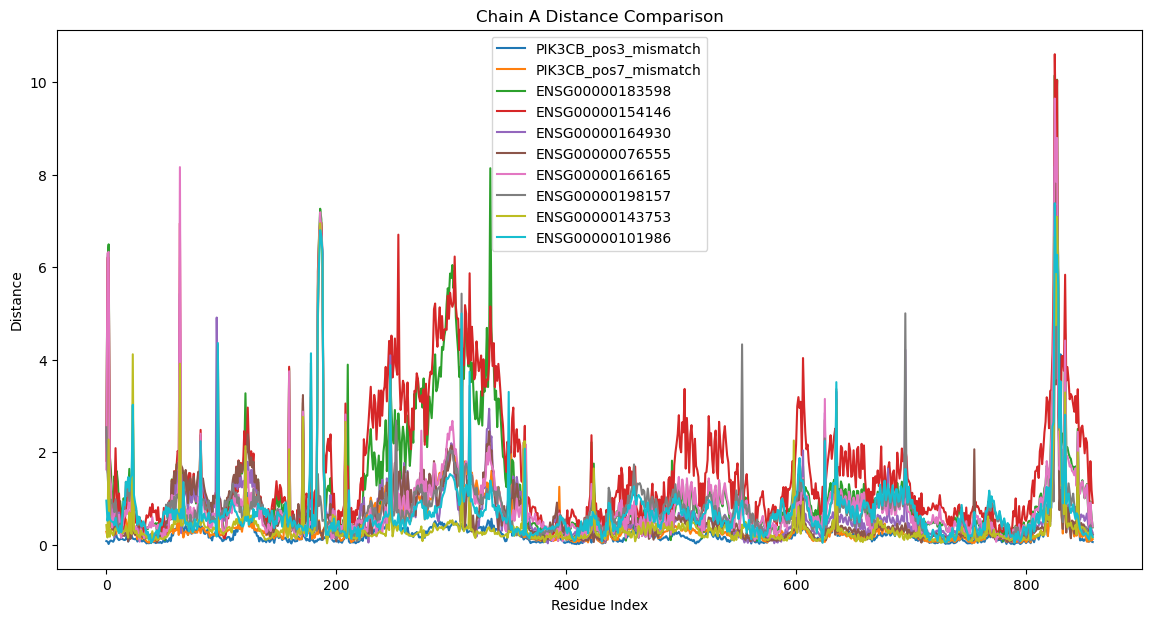

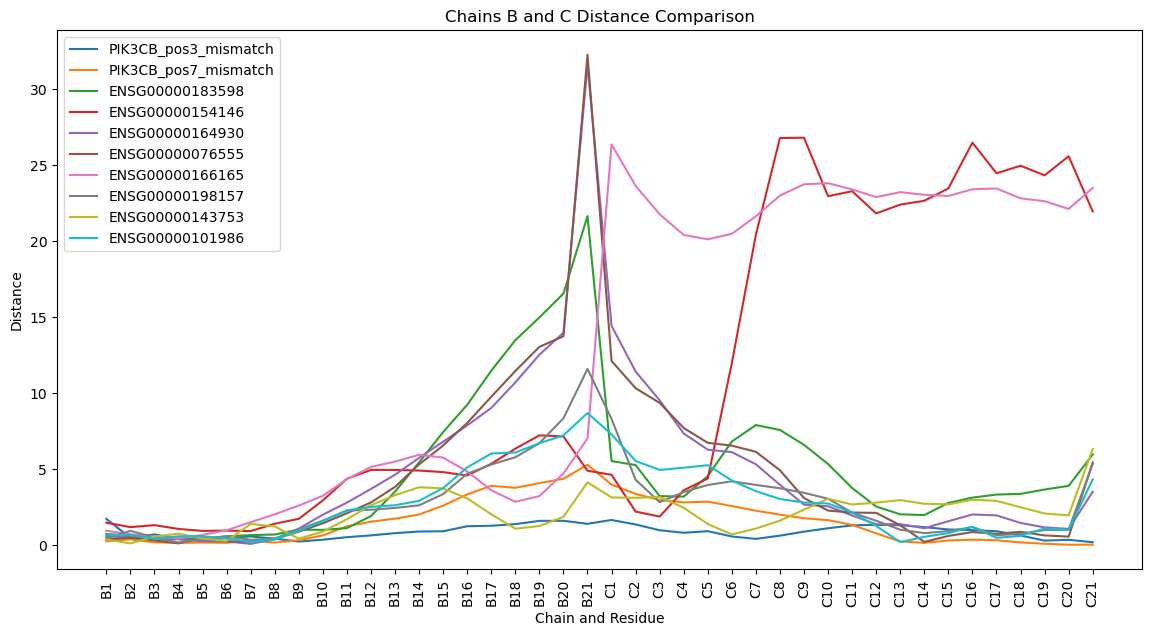

In [22]:
### SELECTS 10 RANDOMS FROM PRODUCTION LIST. ONLY WORKS WITH .CIFS B/C OF CHAIN INDEX
from pymol import cmd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

cmd.reinitialize()

# Load base files
files = ['PIK3CB_guide_target.cif', 'PIK3CB_pos3_mismatch.cif', 'PIK3CB_pos7_mismatch.cif']
# files = ['4f3t.cif', 'PIK3CB_pos3_mismatch.cif', 'PIK3CB_pos7_mismatch.cif']

# Add 8 more random files from ../output_cifs directory
output_dir = '../output_cifs'
additional_files = random.sample(os.listdir(output_dir), 8)
files.extend([os.path.join(output_dir, file) for file in additional_files])

structures = []
for file in files:
    name = os.path.basename(file).split('.')[0]  # Just the file name without extension
    cmd.load(file, name)
    structures.append(name)

# Align all structures to the guide target (structure[0])
for name in structures[1:]:
    cmd.align(name, structures[0])

# Chain A data processing
residues_A = {}
for name in structures:
    cmd.select('chain_A', f'{name} and chain A')
    atoms = cmd.get_model('chain_A').atom
    residues_A[name] = {(atom.chain, int(atom.resi)): atom.coord for atom in atoms}

common_residues_A = sorted(set.intersection(*(set(residues_A[name].keys()) for name in structures)))

index_A = []
distances_A = {name: [] for name in structures[1:]}

for idx, key in enumerate(common_residues_A):
    coord_ref = np.array(residues_A[structures[0]][key])
    index_A.append(idx)
    for name in structures[1:]:
        coord = np.array(residues_A[name][key])
        dist = np.linalg.norm(coord - coord_ref)
        distances_A[name].append(dist)

# Plot Chain A
plt.figure(figsize=(14, 7))
for name in structures[1:]:
    plt.plot(index_A, distances_A[name], label=name)

plt.xlabel('Residue Index')
plt.ylabel('Distance')
plt.title('Chain A Distance Comparison')
plt.legend()
plt.show()

# Chains B and C data processing
residues_BC = {}
for name in structures:
    cmd.select('chain_BC', f'{name} and (chain B or chain C)')
    atoms = cmd.get_model('chain_BC').atom
    residues_BC[name] = {(atom.chain, int(atom.resi)): atom.coord for atom in atoms}

common_residues_BC = sorted(set.intersection(*(set(residues_BC[name].keys()) for name in structures)))

index_BC = []
distances_BC = {name: [] for name in structures[1:]}
chain_order = []

for idx, key in enumerate(common_residues_BC):
    coord_ref = np.array(residues_BC[structures[0]][key])
    index_BC.append(idx)
    chain_order.append(f'{key[0]}{key[1]}')  # Store chain and residue number for x-axis
    for name in structures[1:]:
        coord = np.array(residues_BC[name][key])
        dist = np.linalg.norm(coord - coord_ref)
        distances_BC[name].append(dist)

# Plot Chains B and C
plt.figure(figsize=(14, 7))
for name in structures[1:]:
    plt.plot(index_BC, distances_BC[name], label=name)

plt.xticks(ticks=range(len(chain_order)), labels=chain_order, rotation=90)
plt.xlabel('Chain and Residue')
plt.ylabel('Distance')
plt.title('Chains B and C Distance Comparison')
plt.legend()
plt.show()
